## **Download the Data (The Gale Encyclopedia of Medicine)**

In [1]:
import os
import urllib.request

In [2]:
file_path = "medical_book.pdf"
url = "https://raw.githubusercontent.com/bluemusk24/GenerativeAI/main/Medical-Q%26A-bot/data/medical_book.pdf"

# Always download the file to ensure the latest version is used
with urllib.request.urlopen(url) as response:
    pdf_data = response.read()
with open(file_path, "wb") as file:
    file.write(pdf_data)

In [3]:
print(file,'\n\n', file.name)

<_io.BufferedWriter name='medical_book.pdf'> 

 medical_book.pdf


## **Read PDF Data and Extract Text Content**

In [4]:
!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.0/329.0 kB 19.1 MB/s eta 0:00:00


In [5]:
from pypdf import PdfReader

In [6]:
def extract_text_from_pdf(pdf_path):

  # open PDF file in binary mode
  with open(pdf_path, 'rb') as file:
    reader = PdfReader(file)

    # Initialize an empty string to store all text
    full_text = ""

    # Iterate through all the pages an extract text
    for page in reader.pages:
      full_text += page.extract_text() or ""    # use 'or ""' to handdle pages with no extractable text

  return full_text

In [7]:
text_content = extract_text_from_pdf(file.name)

print(text_content, '\n\n Total Length of Characters:', len(text_content))

The GALE
ENCYCLOPEDIA
of MEDICINE
SECOND EDITIONThe GALE
ENCYCLOPEDIA
of MEDICINE
SECOND EDITION
JACQUELINE L. LONGE, EDITOR
DEIRDRE S. BLANCHFIELD, ASSOCIATE EDITOR
VOLUME
A-B
1STAFF
Jacqueline L. Longe, Project Editor
Deirdre S. Blanchfield, Associate Editor
Christine B. Jeryan, Managing Editor
Donna Olendorf, Senior Editor
Stacey Blachford, Associate Editor
Kate Kretschmann, Melissa C. McDade, Ryan
Thomason, Assistant Editors
Mark Springer, Technical Specialist
Andrea Lopeman, Programmer/Analyst
Barbara J. Yarrow,Manager, Imaging and Multimedia
Content
Robyn V . Young,Project Manager, Imaging and
Multimedia Content
Dean Dauphinais, Senior Editor, Imaging and
Multimedia Content
Kelly A. Quin, Editor, Imaging and Multimedia Content
Leitha Etheridge-Sims, Mary K. Grimes, Dave Oblender,
Image Catalogers
Pamela A. Reed, Imaging Coordinator
Randy Bassett, Imaging Supervisor
Robert Duncan, Senior Imaging Specialist
Dan Newell, Imaging Specialist
Christine O’Bryan, Graphic Specialist
Maria 

### **Creating Tokens for Text Data**

<div class="alert alert-block alert-warning">

Using some simple example text, we can use the ```re.split command``` with the following
syntax to split a text on whitespace characters:</div>

In [8]:
import re

text = "Hello, world. This, is a test."
result = re.split(r'(\s)', text)

print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


<div class="alert alert-block alert-info">
The result is a list of individual words, whitespaces, and punctuation characters
</div>

<div class="alert alert-block alert-warning">

Let's modify the regular expression splits on whitespaces (\s) and commas, and periods
([,.]):</div>

In [9]:
result = re.split(r'([,.]|\s)', text)

print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


<div class="alert alert-block alert-info">
We can see that the words and punctuation characters are now separate list entries just as
we wanted
</div>


<div class="alert alert-block alert-warning">

A small remaining issue is that the list still includes whitespace characters. Optionally, we
can remove these redundant characters safely as follows:</div>

In [10]:
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


<div class="alert alert-block alert-warning">

The tokenization scheme devised above works well on the simple sample text. Let's
modify it a bit further so that it can also handle other types of punctuation, such as
question marks, quotation marks, and the double-dashes along with additional special characters: </div>

In [11]:
text = "Hello, world. Is this-- a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [12]:
# Strip whitespace from each item and then filter out any empty strings.
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [13]:
text = "Hello, world. Is this-- a test?"

result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


Apply the Basic Tokenizer devised above to the dataset

In [14]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text_content)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(preprocessed[:50])

['The', 'GALE', 'ENCYCLOPEDIA', 'of', 'MEDICINE', 'SECOND', 'EDITIONThe', 'GALE', 'ENCYCLOPEDIA', 'of', 'MEDICINE', 'SECOND', 'EDITION', 'JACQUELINE', 'L', '.', 'LONGE', ',', 'EDITOR', 'DEIRDRE', 'S', '.', 'BLANCHFIELD', ',', 'ASSOCIATE', 'EDITOR', 'VOLUME', 'A-B', '1STAFF', 'Jacqueline', 'L', '.', 'Longe', ',', 'Project', 'Editor', 'Deirdre', 'S', '.', 'Blanchfield', ',', 'Associate', 'Editor', 'Christine', 'B', '.', 'Jeryan', ',', 'Managing', 'Editor']


In [15]:
print(len(preprocessed))

480635


### **Creating Token IDs**

<div class="alert alert-block alert-warning">

In the above, we tokenized Gale Encyclopedia of Medicine and assigned it to a
Python variable called ```preprocessed```. Now, create a list of all unique tokens and sort
them alphabetically to determine the vocabulary size:</div>

In [16]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)

print(vocab_size)

31970


<div class="alert alert-block alert-success">

After determining that the vocabulary size is 31981 via the above code, we create the
vocabulary and print its first 51 entries for illustration purposes:

</div>

In [17]:
vocab = {token:integer for integer,token in enumerate(all_words)}
vocab

{'!': 0,
 '#1': 1,
 '#1600': 2,
 '#2001': 3,
 '#201': 4,
 '#231': 5,
 '#280': 6,
 '#29': 7,
 '#400': 8,
 '#406': 9,
 '$1': 10,
 '$10': 11,
 '$100': 12,
 '$114': 13,
 '$125': 14,
 '$18': 15,
 '$185': 16,
 '$2': 17,
 '$200': 18,
 '$200-$400': 19,
 '$250': 20,
 '$250-': 21,
 '$30': 22,
 '$300': 23,
 '$30–70': 24,
 '$350': 25,
 '$36': 26,
 '$4': 27,
 '$40': 28,
 '$40-80': 29,
 '$400': 30,
 '$414': 31,
 '$45': 32,
 '$50': 33,
 '$50-$100': 34,
 '$500': 35,
 '$700': 36,
 '$750': 37,
 '$800': 38,
 '$900': 39,
 '&': 40,
 '&id=57': 41,
 "'": 42,
 '(': 43,
 ')': 44,
 '*Also': 45,
 '*Atarax': 46,
 '*Insulin': 47,
 '+00': 48,
 ',': 49,
 '-': 50,
 '-0433': 51,
 '-1': 52,
 '-828-7866': 53,
 '-II': 54,
 '-John’s-wort': 55,
 '-Oct': 56,
 '-cell': 57,
 '-cells': 58,
 '-foot': 59,
 '.': 60,
 '/': 61,
 '//': 62,
 '//216': 63,
 '//acousticneuromaseattle': 64,
 '//actis': 65,
 '//allergy': 66,
 '//anausa': 67,
 '//androgenetic-alopecia': 68,
 '//cancernet': 69,
 '//cis': 70,
 '//csi': 71,
 '//health': 72,
 

Get the first 50 entries

In [18]:
for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 50:
        break

('!', 0)
('#1', 1)
('#1600', 2)
('#2001', 3)
('#201', 4)
('#231', 5)
('#280', 6)
('#29', 7)
('#400', 8)
('#406', 9)
('$1', 10)
('$10', 11)
('$100', 12)
('$114', 13)
('$125', 14)
('$18', 15)
('$185', 16)
('$2', 17)
('$200', 18)
('$200-$400', 19)
('$250', 20)
('$250-', 21)
('$30', 22)
('$300', 23)
('$30–70', 24)
('$350', 25)
('$36', 26)
('$4', 27)
('$40', 28)
('$40-80', 29)
('$400', 30)
('$414', 31)
('$45', 32)
('$50', 33)
('$50-$100', 34)
('$500', 35)
('$700', 36)
('$750', 37)
('$800', 38)
('$900', 39)
('&', 40)
('&id=57', 41)
("'", 42)
('(', 43)
(')', 44)
('*Also', 45)
('*Atarax', 46)
('*Insulin', 47)
('+00', 48)
(',', 49)
('-', 50)


<div class="alert alert-block alert-info">
As we can see, based on the output above, the dictionary contains individual tokens
associated with unique integer labels.
</div>


<div class="alert alert-block alert-success">

Later when we want to convert the outputs of an LLM from numbers back into
text, we also need a way to turn token IDs into text.

For this, we can create an inverse
version of the vocabulary that maps token IDs back to corresponding text tokens.

</div>


<div class="alert alert-block alert-success">

Let's implement a complete tokenizer class in Python.

The class will have an encode method that splits
text into tokens and carries out the string-to-integer mapping to produce token IDs via the
vocabulary.

In addition, we implement a decode method that carries out the reverse
integer-to-string mapping to convert the token IDs back into text.

</div>

<div class="alert alert-block alert-info">
    
Step 1: Store the vocabulary as a class attribute for access in the encode and decode methods
    
Step 2: Create an inverse vocabulary that maps token IDs back to the original text tokens

Step 3: Process input text into token IDs

Step 4: Convert token IDs back into text

Step 5: Replace spaces before the specified punctuation

</div>




In [19]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)

        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

<div class="alert alert-block alert-success">

Instantiate a new tokenizer object from the SimpleTokenizerV1 class and tokenize a
section from The Gale Encyclopedia of Medicine to try it out in practice:
</div>

In [20]:
tokenizer = SimpleTokenizerV1(vocab)

text = """Prevention
Eliminating exposure to textile dust is the surest way
to prevent byssinosis. Using exhaust hoods, improving
ventilation, and employing wetting procedures are very
successful methods of controlling dust levels to prevent
byssinosis. Protective equipment required during certain
procedures also prevents exposure to levels of contami-
nation that exceed the current United States standard for
cotton dust exposure."""

ids = tokenizer.encode(text)
print(ids)

[10159, 6134, 18846, 29455, 29115, 17966, 21566, 29130, 28690, 30743, 29455, 25574, 15162, 60, 12149, 18777, 20473, 49, 20883, 30467, 49, 13496, 18278, 30814, 25646, 13912, 30506, 28544, 22878, 24060, 16530, 17966, 22054, 29455, 25574, 15162, 60, 10254, 18498, 26647, 17965, 15541, 25646, 13321, 25586, 18846, 29455, 22054, 24060, 16469, 23445, 29128, 18712, 29130, 16852, 12099, 11364, 28215, 19403, 16650, 17966, 18846, 60]


<div class="alert alert-block alert-info">
    
The code above prints the following token IDs:
Next, let's see if we can turn these token IDs back into text using the decode method:
</div>

In [21]:
tokenizer.decode(ids)

'Prevention Eliminating exposure to textile dust is the surest way to prevent byssinosis. Using exhaust hoods, improving ventilation, and employing wetting procedures are very successful methods of controlling dust levels to prevent byssinosis. Protective equipment required during certain procedures also prevents exposure to levels of contami- nation that exceed the current United States standard for cotton dust exposure.'

<div class="alert alert-block alert-info">
    
Based on the output above, we can see that the decode method successfully converted the
token IDs back into the original text.
</div>


<div class="alert alert-block alert-success">

So far, so good. We implemented a tokenizer capable of tokenizing and de-tokenizing text based on a snippet from the training set.

Let's now apply it to a new text sample that
is not contained in the training set:
</div>

In [22]:
text = "Hello, do you like tea?"
print(tokenizer.encode(text))

KeyError: 'Hello'

<div class="alert alert-block alert-info">
    
The problem is that the word "Hello" was not used in the The Gale Encyclopedia of Medicine document.

Hence, it
is not contained in the vocabulary.

This highlights the need to consider large and diverse
training sets to extend the vocabulary when working on LLMs.

</div>

### ADDING SPECIAL CONTEXT TOKENS

In the previous section, we implemented a simple tokenizer and applied it to a section from the training set.

In this section, we will modify this tokenizer to handle unknown
words.

In particular, we will modify the vocabulary and tokenizer we implemented in the
previous section, **SimpleTokenizerV2**, to support two new tokens: ***<|unk|> and <|endoftext|>***

<div class="alert alert-block alert-warning">

We can modify the tokenizer to use an ***<|unk|>*** token if it
encounters a word that is not part of the vocabulary.

Furthermore, we add a token between
unrelated texts.

For example, when training ```GPT-like``` LLMs on multiple independent
documents or books, it is common to insert a token before each document or book that follows a previous text source

</div>

<div class="alert alert-block alert-success">

Let's now modify the vocabulary to include these two special tokens, ***<unk*** and ***<|endoftext|>***, by adding these to the list of all unique words that we created in the
previous section:
</div>

In [23]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
#all_tokens

vocab = {token:integer for integer,token in enumerate(all_tokens)}

In [24]:
len(vocab.items())

31972

<div class="alert alert-block alert-info">
    
Based on the output of the print statement above, the new vocabulary size is 31983 (the
vocabulary size in the previous section was 31981).

</div>

<div class="alert alert-block alert-success">

As an additional quick check, let's print the last 5 entries of the updated vocabulary:
</div>

In [25]:
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('•f', 31967)
('•l', 31968)
('•lLow', 31969)
('<|endoftext|>', 31970)
('<|unk|>', 31971)


<div class="alert alert-block alert-success">

A simple text tokenizer that handles unknown words</div>

<div class="alert alert-block alert-info">
    
Step 1: Replace unknown words by <|unk|> tokens
    
Step 2: Replace spaces before the specified punctuations

</div>


In [26]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = { i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [
            item if item in self.str_to_int
            else "<|unk|>" for item in preprocessed
        ]

        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)
        return text

In [27]:
tokenizer = SimpleTokenizerV2(vocab)

text1 = "Hello, do you like tea?"
text2 = "I need an urgent vacation to Dubai."

text = " <|endoftext|> ".join((text1, text2))

print(text)

Hello, do you like tea? <|endoftext|> I need an urgent vacation to Dubai.


In [28]:
tokenizer.encode(text)

[31971,
 49,
 17749,
 31056,
 22122,
 28942,
 2901,
 31970,
 7417,
 23503,
 13449,
 31971,
 30327,
 29455,
 31971,
 60]

In [29]:
tokenizer.decode(tokenizer.encode(text))

'<|unk|>, do you like tea? <|endoftext|> I need an <|unk|> vacation to <|unk|>.'


<div class="alert alert-block alert-info">
    
Based on comparing the de-tokenized text above with the original input text, we know that
the training dataset, Edith Wharton's short story The Verdict, did not contain the words
```"Hello" and "Dubai."```

</div>


<div class="alert alert-block alert-warning">

So far, we have discussed tokenization as an essential step in processing text as input to
LLMs. Depending on the LLM, some researchers also consider additional special tokens such
as the following:

***[BOS]*** (beginning of sequence): This token marks the start of a text. It
signifies to the LLM where a piece of content begins.

***[EOS]*** (end of sequence): This token is positioned at the end of a text,
and is especially useful when concatenating multiple unrelated texts,
similar to <|endoftext|>. For instance, when combining two different
Wikipedia articles or books, the [EOS] token indicates where one article
ends and the next one begins.

***[PAD]*** (padding): When training LLMs with batch sizes larger than one,
the batch might contain texts of varying lengths. To ensure all texts have
the same length, the shorter texts are extended or "padded" using the
```[PAD]``` token, up to the length of the longest text in the batch.

</div>


<div class="alert alert-block alert-warning">

Note that the tokenizer used for **GPT models** does not need any of these tokens mentioned above but only uses an ```<|endoftext|>``` token for simplicity

</div>

<div class="alert alert-block alert-warning">

the tokenizer used for **GPT models** also doesn't use an ```<|unk|>``` token for out-of-vocabulary words. Instead, GPT models use a ***Byte Pair Encoding tokenizer***, which breaks down words into subword units.
</div>

## **BYTE PAIR ENCODING (BPE TOKENIZER)**

In [30]:
import tiktoken

print("tiktoken version:", tiktoken.__version__)

tiktoken version: 0.12.0


In [31]:
# Initialize the encodings for GPT-2, GPT-3, and GPT-4
encodings = {
    "gpt2": tiktoken.get_encoding("gpt2"),
    "gpt3": tiktoken.get_encoding("p50k_base"),  # Commonly associated with GPT-3 models
    "gpt4": tiktoken.get_encoding("cl100k_base")  # Used for GPT-4 and later versions
}

# Get the vocabulary size for each encoding
vocab_sizes = {model: encoding.n_vocab for model, encoding in encodings.items()}

# Print the vocabulary sizes
for model, size in vocab_sizes.items():
    print(f"The vocabulary size for {model.upper()} is: {size}")


The vocabulary size for GPT2 is: 50257
The vocabulary size for GPT3 is: 50281
The vocabulary size for GPT4 is: 100277


In [32]:
# Get BPE Tokenizer for GPT-3

tokenizer = tiktoken.get_encoding("p50k_base")

In [33]:
text = (
    """Hello, do you like tea? <|endoftext|> I need an urgent vacation to Dubai
    of someunknownPlace."""
)

integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})

print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 314, 761, 281, 18039, 14600, 284, 24520, 198, 50258, 286, 617, 34680, 27271, 13]


<div class="alert alert-block alert-success">
We can then convert the token IDs back into text using the decode method, similar to our SimpleTokenizerV2 earlier
</div>


In [34]:
strings = tokenizer.decode(integers)

print(strings)

Hello, do you like tea? <|endoftext|> I need an urgent vacation to Dubai
    of someunknownPlace.


<div class="alert alert-block alert-warning">

We can make two noteworthy observations based on the token IDs and decoded text
above.

First, the <|endoftext|> token is assigned a relatively large token ID, namely,
**50256**.

In fact, the BPE tokenizer, which was used to train models such as ```GPT-2``` has a total vocabulary size of **50257**,  ```GPT-3``` has a total vocabulary size of **50281**, and the original model used in ChatGPT, has a total vocabulary size of **50257** with <|endoftext|> being assigned the largest token ID.

</div>

<div class="alert alert-block alert-warning">

Second, the ***BPE Tokenizer*** above encodes and decodes unknown words, such as
"someunknownPlace" correctly.

The BPE tokenizer can handle any unknown word. How does
it achieve this without using <|unk|> tokens?
    
</div>

<div class="alert alert-block alert-warning">

The algorithm underlying ***BPE*** breaks down words that aren't in its predefined vocabulary into smaller subword units or even individual characters.

This enables it to handle out-of-vocabulary words.

So, thanks to the ***BPE algorithm***, if the tokenizer encounters an
unfamiliar word during tokenization, it can represent it as a sequence of subword tokens or characters
    
</div>

**Let us take another simple example to illustrate how the BPE tokenizer deals with unknown tokens**

In [35]:
integers = tokenizer.encode("Akwirw ier")
print(integers)

strings = tokenizer.decode(integers)
print(strings)

[33901, 86, 343, 86, 220, 959]
Akwirw ier


## **DATA SAMPLING WITH SLIDING WINDOW (INPUT-TARGET PAIRS)**

<div class="alert alert-block alert-success">
* In this section we implement a data loader that fetches the input-target pairs using a sliding window approach.</div>


<div class="alert alert-block alert-success">
* To get started, we will first tokenize the whole The Gale Encyclopedia Medicine we worked with earlier using the BPE tokenizer introduced in the previous section:</div>



In [36]:
enc_text = tokenizer.encode(text_content)
print(len(enc_text))

667062



<div class="alert alert-block alert-info">
    
Executing the code above returns ***667072*** tokens and tokens ID in the vocabulary training set, after applying the BPE Tokenizer

</div>


<div class="alert alert-block alert-success">

Next, we remove some tokens from the dataset for demonstration purposes.

</div>

In [37]:
enc_sample = enc_text[2000:]

<div class="alert alert-block alert-warning">

Create 2 variables ```(X and Y)```, where X contains the input tokens and Y contains the target tokens. ***Y == X + 1***

The ***Context Size*** determines how many tokens are included in the input. The number can be changed.

The ***Context Size*** tells the model to look at the first 4 words in a sequence, so it predicts the next word in that sequence. eg input (X) = [1,2,3,4] and the predicted target (Y) should be [2,3,4,5]

</div>

In [38]:
context_size = 4

x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]

print(f"x: {x}")
print(f"y:      {y}")

x: [17555, 290, 31814, 355]
y:      [290, 31814, 355, 198]


<div class="alert alert-block alert-info">

Processing the input and targets (input+1), we create the next word predictions task as follows with below codes.

THe LLM receives all context tokens in the left as input and predicts the desired tokens in the right side as target

</div>

In [39]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(context, "---->", desired)

[17555] ----> 290
[17555, 290] ----> 31814
[17555, 290, 31814] ----> 355
[17555, 290, 31814, 355] ----> 198


<div class="alert alert-block alert-success">
For illustration purposes, let's repeat the previous code but convert the token IDs into text
</div>

In [40]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

 guides ---->  and
 guides and ---->  textbooks
 guides and textbooks ---->  as
 guides and textbooks as ----> 



<div class="alert alert-block alert-warning">

We've now created the input-target pairs that we can turn into use for the LLM training.
    
</div>

<div class="alert alert-block alert-warning">

There's only one more task before we can turn the tokens into embeddings: implementing an efficient data loader that
iterates over the input dataset and returns the inputs and targets as PyTorch tensors, which
can be thought of as multidimensional arrays.
    
</div>

<div class="alert alert-block alert-warning">

In particular, we are interested in returning two tensors: an ***input tensor*** containing the text that the LLM sees and a ***target tensor*** that includes the targets for the LLM to predict,
    
</div>


### **IMPLEMENTING A DATA LOADER THAT ITERATES OVER ENTIRE DATASET TO GET INPUT AND OUTPUT PAIRS AS PYTORCH TENSORS**

<div class="alert alert-block alert-success">
For the efficient data loader implementation, we will use PyTorch's built-in Dataset and
DataLoader classes.</div>

In [41]:
import torch

In [42]:
from torch.utils.data import Dataset, DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

<div class="alert alert-block alert-warning">

* Feed the Dataset created above into the DataLoader
* max_length = context_size (number of tokens gpt2, gpt3, and gpt4 can take)
* stride = number of tokens shifted postion
* num_workers = CPU usage

</div>

<div class="alert alert-block alert-warning">

The ***GPTDatasetV1*** class above is based on the PyTorch Dataset class.

It defines how individual rows are fetched from the dataset.

Each row consists of a number of token IDs (based on a max_length) assigned to an input_chunk tensor.

The target_chunk tensor contains the corresponding targets.

I recommend reading on to see how the data
returned from this dataset looks like when we combine the dataset with a PyTorch
DataLoader -- this will bring additional intuition and clarity.
    
</div>

<div class="alert alert-block alert-success">
The following code will use the GPTDatasetV1 to load the inputs in batches via a PyTorch DataLoader:</div>


<div class="alert alert-block alert-info">
    
Step 1: Initialize the tokenizer

Step 2: Create dataset

Step 3: drop_last=True drops the last batch if it is shorter than the specified batch_size to prevent loss spikes
during training

Step 4: The number of CPU processes to use for preprocessing
    
</div>

In [43]:
def create_dataloader_v1(txt, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):

    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("p50k_base")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

<div class="alert alert-block alert-success">
    
Let's test the dataloader with a ```batch size``` of 1 for an LLM with a ```context size``` of 4,

This will develop an intuition of how the GPTDatasetV1 class and the
create_dataloader_v1 function work together: </div>

<div class="alert alert-block alert-info">

* Get input-target pairs (tensors) for individual batch, max_length of 4 (number of tokens_ID), stride=1

</div>

In [44]:
import torch
print("PyTorch version:", torch.__version__, '\n')
dataloader = create_dataloader_v1(
    text_content, batch_size=1, max_length=4, stride=1, shuffle=False
)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

PyTorch version: 2.9.0+cpu 

[tensor([[  464,   402, 21358,   198]]), tensor([[  402, 21358,   198, 45155]])]


<div class="alert alert-block alert-warning">

The first_batch variable contains two tensors: the first tensor stores the input token IDs,
and the second tensor stores the target token IDs.

Since the max_length is set to 4, each of the two tensors contains 4 token IDs.

Note that an input size of 4 is relatively small and only chosen for illustration purposes. It is common to train LLMs with input sizes of at least
256.
    
</div>

<div class="alert alert-block alert-success">
    
To illustrate the meaning of stride=1, let's fetch another batch from this dataset: </div>

In [45]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[  402, 21358,   198, 45155]]), tensor([[21358,   198, 45155,  5097]])]


In [46]:
third_batch = next(data_iter)
print(third_batch)

[tensor([[21358,   198, 45155,  5097]]), tensor([[  198, 45155,  5097,  3185]])]


<div class="alert alert-block alert-warning">

If we compare the first batch with the second batch and second batch with the third batch, we can see that the second batch's token
IDs are shifted by one position compared to the first batch.
Same for the third batch compared to the second batch

For example, the second ID in
the first batch's input is 402, which is the first ID of the second batch's input.

The stride
setting dictates the number of positions the inputs shift across batches, emulating a sliding
window approach
    
</div>

<div class="alert alert-block alert-warning">

Batch sizes of 1, such as we have sampled from the data loader so far, are useful for illustration purposes.
                                                                                
If you have previous experience with deep learning, you may know
that small batch sizes require less memory during training but lead to more noisy model
updates.

Just like in regular deep learning, the batch size is a trade-off and hyperparameter to experiment with when training LLMs.
    
</div>

* <div class="alert alert-block alert-success">
Input-Target Pairs for the entire dataset
</div>

In [47]:
dataloader = create_dataloader_v1(text_content, batch_size=8, max_length=4, stride=4, shuffle=False)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[  464,   402, 21358,   198],
        [45155,  5097,  3185,  1961],
        [ 3539,   198,  1659, 26112],
        [ 2149,  8881,   198, 23683],
        [18672, 39219,   464,   402],
        [21358,   198, 45155,  5097],
        [ 3185,  1961,  3539,   198],
        [ 1659, 26112,  2149,  8881]])

Targets:
 tensor([[  402, 21358,   198, 45155],
        [ 5097,  3185,  1961,  3539],
        [  198,  1659, 26112,  2149],
        [ 8881,   198, 23683, 18672],
        [39219,   464,   402, 21358],
        [  198, 45155,  5097,  3185],
        [ 1961,  3539,   198,  1659],
        [26112,  2149,  8881,   198]])


<div class="alert alert-block alert-info">
    
* Note that we increase the stride to 4. This is to utilize the data set fully (we don't skip a single word) but also avoid any overlap between the batches, since more overlap could lead
to increased overfitting.
    
</div>

## **CREATE TOKEN EMBEDDINGS**

<div class="alert alert-block alert-warning">

* Illustration of how token IDs are converted to vector embeddings.

* Here we assume 2,3,5,1 are token IDs

</div>

In [48]:
input_ids = torch.tensor([2, 3, 5, 1])

<div class="alert alert-block alert-info">
    
* Let's assume we have a vocabulary size of 6 words and want to create an embedding size of 3
    
* Using a vocab_size and output_dim, we can instantiate an embedding layer in Pytorch

* Set random seed = 123
</div>

In [49]:
vocab_size = 6
output_dim = 3

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [50]:
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


<div class="alert alert-block alert-success">

* The weight matrix of the embedding layer gotten above contains small, random values. These values are optimized during LLM training.

* Also, the weights of the LLM predicting the next word is optimized during training
</div>

In [51]:
print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


<div class="alert alert-block alert-info">

* Vector embeddings for all the token IDs

</div>

In [52]:
print(embedding_layer(input_ids))

tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


<div class="alert alert-block alert-info">
    
Each row in this output matrix is obtained via a lookup operation from the embedding
weight matrix
    
</div>

### **POSITIONAL EMBEDDINGS (ENCODING WORD POSITIONS)**

<div class="alert alert-block alert-success">

* We assume the output dimensional size for each token ID is 256 and vocabulary size is 50281 for GPT3 to create an embedding layer
* Also assume token IDs were creeated using Byte-Pair Encoder
                                                                                              
</div>

<div class="alert alert-block alert-success">

Previously, we focused on very small embedding sizes in this chapter for illustration
purposes.

We now consider more realistic and useful embedding sizes and encode the input
tokens into a 256-dimensional vector representation.

This is smaller than what the original
GPT-3 model used (in GPT-3, the embedding size is 12,288 dimensions) but still reasonable
for experimentation.

Furthermore, we assume that the token IDs were created by the BPE
tokenizer that we implemented earlier, which has a vocabulary size of 50,281:

</div>

In [53]:
vocab_size = 50281
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

<div class="alert alert-block alert-warning">
    
* Using the embedding layer above, sampling from a dataloader, embed each token with batch size of 8 and 4 token each in a 256-dimensional vector space. The resulting output will be ```8 x 4 x 256 tensor```

* Instantiate the dataloader (Data Sampling with a sliding window)
</div>

In [54]:
max_length = 4
dataloader = create_dataloader_v1(
    text_content, batch_size=8, max_length=max_length,
    stride=max_length, shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)

In [55]:
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[  464,   402, 21358,   198],
        [45155,  5097,  3185,  1961],
        [ 3539,   198,  1659, 26112],
        [ 2149,  8881,   198, 23683],
        [18672, 39219,   464,   402],
        [21358,   198, 45155,  5097],
        [ 3185,  1961,  3539,   198],
        [ 1659, 26112,  2149,  8881]])

Inputs shape:
 torch.Size([8, 4])


<div class="alert alert-block alert-info">

* From the above, the token ID sensor is 8x4- dimensional, meaning the data batch consist of 8 text samples with 4 token IDs

* We use the create embedding layer to embed each token ID into a 256-dimensional vectors

</div>

In [56]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [57]:
token_embeddings

tensor([[[ 3.5963e-02,  1.0094e+00,  1.5110e-01,  ...,  1.4460e+00,
           6.6325e-04,  1.2537e+00],
         [ 1.9847e+00, -6.4828e-01, -1.4146e-01,  ..., -3.8410e-01,
          -9.3553e-01,  1.4478e+00],
         [-1.5610e+00, -2.0675e+00, -3.1993e-01,  ..., -1.0575e+00,
           6.2431e-01,  9.4251e-01],
         [-1.4371e-01, -9.7823e-01,  1.5918e+00,  ...,  3.0685e-01,
          -1.1135e+00, -7.2020e-01]],

        [[ 1.0354e+00,  1.7596e-01, -1.8731e+00,  ..., -4.9843e-01,
          -2.2604e+00, -1.2212e+00],
         [-1.2465e+00, -5.6918e-01,  2.5386e+00,  ..., -3.0578e-01,
           3.2366e-01,  1.3455e+00],
         [ 9.0371e-01, -1.8361e-01, -1.8243e+00,  ...,  8.6197e-01,
          -4.2641e-01, -2.3662e+00],
         [ 8.5968e-01, -3.0877e-01, -6.6412e-01,  ..., -3.3888e-01,
          -1.3219e+00, -1.5608e+00]],

        [[ 9.7635e-01, -4.5960e-01, -3.4314e-01,  ...,  1.1715e+00,
          -5.3655e-01,  7.4415e-01],
         [-1.4371e-01, -9.7823e-01,  1.5918e+00,  .

<div class="alert alert-block alert-success">

* For a GPT absolute positional embedding approach, we create another embedding layer that has the same dimensions to get positional embeddings

* The positional embeddings are the exact position for each token in a batch. Here, we have just 4 positions, which is the context length and equal
to the max length
                                                                                              
</div>

In [58]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)

In [59]:
pos_embeddings = pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [60]:
pos_embeddings

tensor([[-1.2202, -0.2870, -0.7909,  ...,  1.2403, -0.0785,  1.1018],
        [ 0.1823, -1.0179,  1.2019,  ...,  0.8508,  0.3723,  0.9018],
        [ 0.7011,  1.1959, -0.7350,  ..., -1.5821, -0.7583, -1.6731],
        [-0.0352,  1.0147,  0.8490,  ..., -0.8283,  0.0285,  0.0072]],
       grad_fn=<EmbeddingBackward0>)

<div class="alert alert-block alert-warning">

* The input embeddings are the created embedded input examples that can now be processed by the main LLM

</div>

<div class="alert alert-block alert-info">
    
As shown in the preceding code example, the input to the pos_embeddings is usually a
placeholder vector torch.arange(context_length), which contains a sequence of
numbers 0, 1, ..., up to the maximum input length − 1.

The context_length is a variable
that represents the supported input size of the LLM.

Here, we choose it similar to the
maximum length of the input text.

In practice, input text can be longer than the supported
context length, in which case we have to truncate the text.
    
</div>

<div class="alert alert-block alert-info">
    
As we can see, the positional embedding tensor consists of four 256-dimensional vectors.
We can now add these directly to the token embeddings, where PyTorch will add the 4x256-
dimensional pos_embeddings tensor to each 4x256-dimensional token embedding tensor in
each of the 8 batches:

* input_embeddings = token_embeddings + positonal_embddings
</div>

In [61]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


<div class="alert alert-block alert-warning">

The input_embeddings we created are the embedded input
examples that can now be processed by the main LLM modules
    
</div>

## **IMPLEMENTING A SIMPLIFIED ATTENTION MECHANISM**

<div class="alert alert-block alert-success">

Consider the following input sentence, which has already been embedded into 3-
dimensional vectors.

We choose a small embedding dimension for
illustration purposes to ensure it fits on the page without line breaks:

</div>

In [62]:
import torch

inputs = torch.tensor(
  [[0.55, 0.89, 0.66], # Home     (x^1)
   [0.77, 0.25, 0.10], # is       (x^2)
   [0.22, 0.58, 0.33], # where    (x^3)
   [0.43, 0.15, 0.89], # the      (x^4)
   [0.57, 0.85, 0.64], # heart    (x^5)
   [0.05, 0.80, 0.55]] # belongs  (x^6)
)

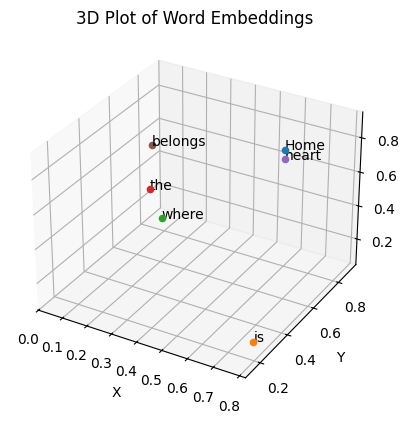

In [63]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Corresponding words
words = ['Home', 'is', 'where', 'the', 'heart', 'belongs']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

* same plot above but using plotly

In [64]:
import plotly.graph_objects as go

# Words
words = ['Home', 'is', 'where', 'the', 'heart', 'belongs']

# Coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D scatter plot
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=x_coords,
            y=y_coords,
            z=z_coords,
            mode='markers+text',
            text=words,
            textposition='top center',
            marker=dict(size=6)
        )
    ]
)

# Layout
fig.update_layout(
    title='3D Plot of Word Embeddings',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

fig.show()


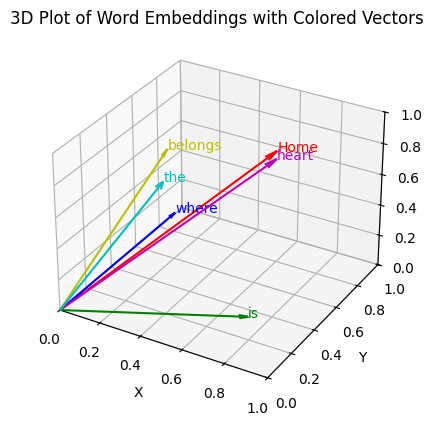

In [65]:
# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()


<div class="alert alert-block alert-info">
    
Each row represents a word, and each column represents an embedding dimension
    
</div>

In [66]:
inputs.shape

torch.Size([6, 3])

* Index of each input and corresponding tensors

In [67]:
for i, x_i in enumerate(inputs):
  print(i, '--->', x_i)

0 ---> tensor([0.5500, 0.8900, 0.6600])
1 ---> tensor([0.7700, 0.2500, 0.1000])
2 ---> tensor([0.2200, 0.5800, 0.3300])
3 ---> tensor([0.4300, 0.1500, 0.8900])
4 ---> tensor([0.5700, 0.8500, 0.6400])
5 ---> tensor([0.0500, 0.8000, 0.5500])


<div class="alert alert-block alert-info">
    
The first input token serves as the query    
</div>

In [68]:
query = inputs[0]  # 1st input token is the query
print(query, '\n')

attn_scores_1 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_1[i] = torch.dot(x_i, query) # dot product (transpose not necessary here since they are 1-dim vectors)

print(attn_scores_1)

tensor([0.5500, 0.8900, 0.6600]) 

tensor([1.5302, 0.7120, 0.8550, 0.9574, 1.4924, 1.1025])


* ['Home', 'is', 'where', 'the', 'heart', 'belongs']

* [1.5302, 0.7120, 0.8550, 0.9574, 1.4924, 1.1025]

These are attention scores for each token in the list wrt first ```query```. Higher dot product == higher attention score and similarity between 2 elements(query vectors and each individual vector)



<div class="alert alert-block alert-success">

In the next step, we normalize each of the attention scores that
we computed previously.

</div>


<div class="alert alert-block alert-success">

The main goal behind the normalization  is to obtain attention weights
that sum up to 1.

This normalization is a convention that is useful for interpretation and for
maintaining training stability in an LLM.

Here's a straightforward method for achieving this
normalization step:

</div>

In [69]:
attn_weights_1_tmp = attn_scores_1 / attn_scores_1.sum()

print("Attention weights:", attn_weights_1_tmp)
print("Sum:", attn_weights_1_tmp.sum())

Attention weights: tensor([0.2301, 0.1071, 0.1286, 0.1440, 0.2244, 0.1658])
Sum: tensor(1.0000)


<div class="alert alert-block alert-info">
    
In practice, it's more common and advisable to use the softmax function for normalization.

Softmax ensures attention weights are Zeros and Ones for extreme large or small values unlike the above attention weight sum method which gives a huge decimal.

This approach is better at managing extreme values and offers more favorable gradient properties during training.

Below is a basic implementation of the softmax function for
normalizing the attention scores:
</div>

**Note**:

* We use Softmax to ensure the extreme large and small weights (values) are between 0s and 1s. To implement Softmax normally, we take the sum of the each weight, divide the total(sum) by the exponential of each individual weight. In Pytorch, we do the same, but the difference is the highest weight is subtracted from the exponential of each weight.

* This process is done to avoid numerical instability when dealing with large and small values during training, otherwise known as oveflow errors.

#### **Normal Softmax without subtracting the maximum values (non-Pytorch approach)**

In [70]:
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_weights_1_naive = softmax_naive(attn_scores_1)

print("Attention weights:", attn_weights_1_naive)
print("Sum:", attn_weights_1_naive.sum())

Attention weights: tensor([0.2422, 0.1069, 0.1233, 0.1366, 0.2332, 0.1579])
Sum: tensor(1.)


<div class="alert alert-block alert-info">
    
As the output shows, the softmax function also meets the objective and normalizes the
attention weights such that they sum to 1
</div>

<div class="alert alert-block alert-warning">

In addition, the softmax function ensures that the attention weights are always positive.
This makes the output interpretable as probabilities or relative importance, where higher weights indicate greater importance.
    
</div>

#### **Normal Softmax with Pytorch Approach**

<div class="alert alert-block alert-warning">

Note that the naive ***Softmax implementation (softmax_naive)*** may encounter numerical instability problems, such as overflow and underflow, when dealing with large or small input values.

Therefore, in practice, it's advisable to use the PyTorch implementation of softmax,
which has been extensively optimized for performance:

For more info on the implementation:
https://docs.pytorch.org/docs/stable/generated/torch.nn.Softmax.html
    
</div>

In [71]:
attn_weights_1 = torch.softmax(attn_scores_1, dim=0)
print("Attention weights:", attn_weights_1)
print("Sum:", attn_weights_1.sum())

Attention weights: tensor([0.2422, 0.1069, 0.1233, 0.1366, 0.2332, 0.1579])
Sum: tensor(1.)


<div class="alert alert-block alert-info">
    
In this case, we can see that it yields the same results as our previous softmax_naive
function:
</div>

<div class="alert alert-block alert-success">

The context vector ```z(1)``` is calculated as a weighted sum of all input
vectors.

This involves multiplying each input vector by its corresponding attention weight:

</div>

In [72]:
query = inputs[0] # first input token is the query

context_vec_1 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    context_vec_1 += attn_weights_1[i]*x_i

print(context_vec_1)

tensor([0.4421, 0.6588, 0.5689])


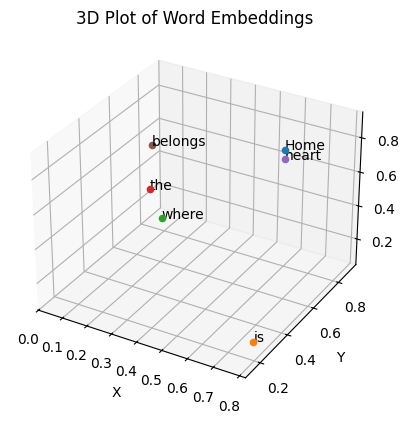

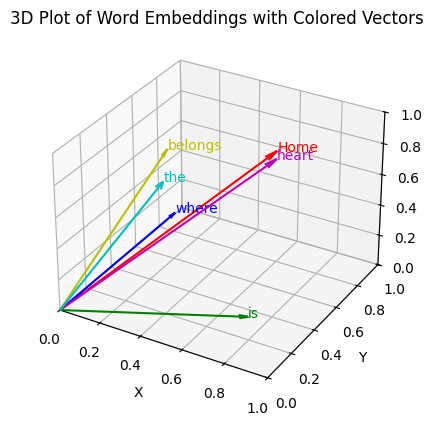

In [73]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

inputs_2 = torch.tensor(
  [[0.55, 0.89, 0.66], # Home     (x^1)
   [0.77, 0.25, 0.10], # is       (x^2)
   [0.22, 0.58, 0.33], # where    (x^3)
   [0.43, 0.15, 0.89], # the      (x^4)
   [0.57, 0.85, 0.64], # heart    (x^5)
   [0.05, 0.80, 0.55], # belongs  (x^6)
   [0.4421, 0.6588, 0.5689]] # Home-context
)

# Corresponding words
words = ['Home', 'is', 'where', 'the', 'heart', 'belongs', 'Home-context']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'r']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

<div class="alert alert-block alert-success">

Now, we can extend this computation to calculate attention weights and context vectors for all inputs.

</div>

<div class="alert alert-block alert-success">

First, we add an additional for-loop to compute the
dot products for all pairs of inputs.

</div>

In [74]:
attn_scores = torch.empty(6, 6)

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)

print(attn_scores)

tensor([[1.5302, 0.7120, 0.8550, 0.9574, 1.4924, 1.1025],
        [0.7120, 0.6654, 0.3474, 0.4576, 0.7154, 0.2935],
        [0.8550, 0.3474, 0.4937, 0.4753, 0.8296, 0.6565],
        [0.9574, 0.4576, 0.4753, 0.9995, 0.9422, 0.6310],
        [1.4924, 0.7154, 0.8296, 0.9422, 1.4570, 1.0605],
        [1.1025, 0.2935, 0.6565, 0.6310, 1.0605, 0.9450]])


In [75]:
# confirming the nested for_loop tensors combination to get attention score for each token wrt to others (not in the lecture note)
for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
      print(i, j, '---->', x_i, x_j)

0 0 ----> tensor([0.5500, 0.8900, 0.6600]) tensor([0.5500, 0.8900, 0.6600])
0 1 ----> tensor([0.5500, 0.8900, 0.6600]) tensor([0.7700, 0.2500, 0.1000])
0 2 ----> tensor([0.5500, 0.8900, 0.6600]) tensor([0.2200, 0.5800, 0.3300])
0 3 ----> tensor([0.5500, 0.8900, 0.6600]) tensor([0.4300, 0.1500, 0.8900])
0 4 ----> tensor([0.5500, 0.8900, 0.6600]) tensor([0.5700, 0.8500, 0.6400])
0 5 ----> tensor([0.5500, 0.8900, 0.6600]) tensor([0.0500, 0.8000, 0.5500])
1 0 ----> tensor([0.7700, 0.2500, 0.1000]) tensor([0.5500, 0.8900, 0.6600])
1 1 ----> tensor([0.7700, 0.2500, 0.1000]) tensor([0.7700, 0.2500, 0.1000])
1 2 ----> tensor([0.7700, 0.2500, 0.1000]) tensor([0.2200, 0.5800, 0.3300])
1 3 ----> tensor([0.7700, 0.2500, 0.1000]) tensor([0.4300, 0.1500, 0.8900])
1 4 ----> tensor([0.7700, 0.2500, 0.1000]) tensor([0.5700, 0.8500, 0.6400])
1 5 ----> tensor([0.7700, 0.2500, 0.1000]) tensor([0.0500, 0.8000, 0.5500])
2 0 ----> tensor([0.2200, 0.5800, 0.3300]) tensor([0.5500, 0.8900, 0.6600])
2 1 ----> te

<div class="alert alert-block alert-info">
    
Each element in the preceding tensor represents an attention score between each pair of inputs.
</div>

<div class="alert alert-block alert-info">
    
When computing the preceding attention score tensor, we used for-loops in Python.
                                                            
However, for-loops are generally slow, and we can achieve the same results using matrix multiplication:
</div>

In [76]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[1.5302, 0.7120, 0.8550, 0.9574, 1.4924, 1.1025],
        [0.7120, 0.6654, 0.3474, 0.4576, 0.7154, 0.2935],
        [0.8550, 0.3474, 0.4937, 0.4753, 0.8296, 0.6565],
        [0.9574, 0.4576, 0.4753, 0.9995, 0.9422, 0.6310],
        [1.4924, 0.7154, 0.8296, 0.9422, 1.4570, 1.0605],
        [1.1025, 0.2935, 0.6565, 0.6310, 1.0605, 0.9450]])


<div class="alert alert-block alert-success">

We now normalize each row so that the values in
each row sum to 1:

</div>

In [77]:
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)

tensor([[0.2422, 0.1069, 0.1233, 0.1366, 0.2332, 0.1579],
        [0.1966, 0.1877, 0.1366, 0.1525, 0.1973, 0.1294],
        [0.2093, 0.1260, 0.1458, 0.1432, 0.2041, 0.1716],
        [0.2011, 0.1220, 0.1242, 0.2097, 0.1980, 0.1451],
        [0.2400, 0.1104, 0.1237, 0.1384, 0.2317, 0.1558],
        [0.2211, 0.0985, 0.1415, 0.1380, 0.2120, 0.1889]])


<div class="alert alert-block alert-warning">

In the context of using PyTorch, the dim parameter in functions like torch.softmax specifies
the dimension of the input tensor along which the function will be computed.

By setting ```dim=-1```, we are instructing the softmax function to apply the normalization along the last dimension of the attn_scores tensor.

If attn_scores is a 2D tensor (for example, with a shape of ```[rows, columns]```), dim=-1 will normalize across the columns so that the values in
each row (summing over the column dimension) sum up to 1.
    
</div>

<div class="alert alert-block alert-success">

* Let's briefly verify that the rows indeed all sum to 1:

</div>

In [78]:
row_2_sum = sum([0.1966, 0.1877, 0.1366, 0.1525, 0.1973, 0.1294])
print("Row 2 sum:", row_2_sum)
print("All row sums:", attn_weights.sum(dim=-1))

Row 2 sum: 1.0001
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


<div class="alert alert-block alert-success">

* In the third and last step, we now use these attention weights to compute all context vectors via matrix multiplication:

</div>

In [79]:
all_context_vecs = attn_weights @ inputs
print(attn_weights.shape, '\n', inputs.shape, '\n')
print(all_context_vecs, '\n', all_context_vecs.shape)

torch.Size([6, 6]) 
 torch.Size([6, 3]) 

tensor([[0.4421, 0.6588, 0.5689],
        [0.4672, 0.5952, 0.5267],
        [0.4307, 0.6346, 0.5513],
        [0.4421, 0.5973, 0.5790],
        [0.4436, 0.6553, 0.5674],
        [0.4182, 0.6555, 0.5649]]) 
 torch.Size([6, 3])


<div class="alert alert-block alert-success">

* We can double-check that the code is correct by comparing the 1st row with the context vector z(1) calculated previously

</div>

In [80]:
print("Previous 1st context vector:", context_vec_1)

Previous 1st context vector: tensor([0.4421, 0.6588, 0.5689])


<div class="alert alert-block alert-info">
    
Based on the result, we can see that the previously calculated context_vec_1 matches the first row in the previous tensor exactly.

This concludes the code walkthrough of a ***Simple Self-Attention Mechanism***.
</div>

## **IMPLEMENTING SELF ATTENTION WITH TRAINABLE WEIGHTS**

In [81]:
import torch

inputs = torch.tensor(
  [[0.55, 0.89, 0.66], # Home     (x^1)
   [0.77, 0.25, 0.10], # is       (x^2)
   [0.22, 0.58, 0.33], # where    (x^3)
   [0.43, 0.15, 0.89], # the      (x^4)
   [0.57, 0.85, 0.64], # heart    (x^5)
   [0.05, 0.80, 0.55]] # belongs  (x^6)
)

<div class="alert alert-block alert-success">

Let's begin by defining a few variables:

* A The first input element

* B The input embedding size, d=3

* C The output embedding size, d_out=2
</div>

In [82]:
x_1 = inputs[0] #A
d_in = inputs.shape[1] #B
d_out = 2 #C

<div class="alert alert-block alert-info">
    
Note that in GPT-like models, the input and output dimensions are usually the same.

But for illustration purposes, to better follow the computation, we choose different input ```(d_in=3)``` and output ```(d_out=2)``` dimensions here.

</div>

<div class="alert alert-block alert-success">

Next, we initialize the three weight matrices ```Wq, Wk and Wv```

Also, ensure the column of input embeddings == the rows of each of the three trainable weight matrices. This is because it's a matrix multiplication, and the rule states: (num of columns of first martrix == num of rows of second matrix)

</div>

* Torch Parameter Documentation
  https://docs.pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html

In [83]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

<div class="alert alert-block alert-info">
    
Note that we are setting requires_grad=False to reduce clutter in the outputs for illustration purposes.

If we were to use the weight matrices for model training, we
would set requires_grad=True to update these matrices during model training.

</div>

<div class="alert alert-block alert-success">

* Next, we compute the query, key, and value vectors as shown earlier for the first vector
</div>

In [84]:
query_1 = x_1 @ W_query
key_1 = x_1 @ W_key
value_1 = x_1 @ W_value
print('Query -->', query_1, '\n Key -->', key_1, '\n Value', value_1)

Query --> tensor([0.4357, 1.4688]) 
 Key --> tensor([0.4470, 1.1564]) 
 Value tensor([0.4015, 1.0118])


<div class="alert alert-block alert-info">
    
As we can see based on the outputs for the query, key and value, this results in a 2-dimensional vector.

This is because: we set the number of columns of the corresponding weight matrix, via ```d_out```, to 2:

</div>

<div class="alert alert-block alert-success">

Even though our temporary goal is to only compute the one context vector z(1),  we still require the key and value vectors for all input elements.

This is because they are involved in computing the attention weights with respect to the query q(1)
</div>

In [85]:
queries = inputs @ W_query
keys = inputs @ W_key
values = inputs @ W_value

print("queries:", queries.shape)
print("keys.shape:", keys.shape)
print("values.shape:", values.shape)

queries: torch.Size([6, 2])
keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])


In [86]:
queries, keys, values

(tensor([[0.4357, 1.4688],
         [0.2983, 0.6565],
         [0.2355, 0.7990],
         [0.2309, 1.0966],
         [0.4300, 1.4343],
         [0.2568, 1.0533]]),
 tensor([[0.4470, 1.1564],
         [0.1827, 0.3292],
         [0.2408, 0.6706],
         [0.3669, 0.7646],
         [0.4361, 1.1156],
         [0.3275, 0.9642]]),
 tensor([[0.4015, 1.0118],
         [0.1492, 0.3346],
         [0.2393, 0.5493],
         [0.1855, 0.8812],
         [0.3879, 0.9831],
         [0.3221, 0.7863]]))

<div class="alert alert-block alert-info">
    
As we can tell from the outputs, we successfully projected the 6 input tokens from a 3D onto a 2D embedding space:

</div>

<div class="alert alert-block alert-success">

* First, let's compute the attention score for first input ω21
</div>

In [87]:
keys_1 = keys[0] #A
attn_score_21 = query_1.dot(keys_1)
print(attn_score_21)

tensor(1.8933)


<div class="alert alert-block alert-success">
Again, we can generalize this computation to all attention scores via matrix multiplication:</div>

In [88]:
# All attention scores for a given query (Home) input wrt to other inputs

attn_scores_1 = query_1 @ keys.T
print(attn_scores_1)

tensor([1.8933, 0.5632, 1.0900, 1.2829, 1.8287, 1.5589])


In [89]:
# Attention scores for each query input wrt to all other inputs

attn_scores_all = queries @ keys.T
print(attn_scores_all)

tensor([[1.8933, 0.5632, 1.0900, 1.2829, 1.8287, 1.5589],
        [0.8926, 0.2707, 0.5121, 0.6114, 0.8626, 0.7307],
        [1.0292, 0.3061, 0.5925, 0.6973, 0.9941, 0.8475],
        [1.3713, 0.4032, 0.7910, 0.9231, 1.3241, 1.1330],
        [1.8508, 0.5508, 1.0654, 1.2544, 1.7877, 1.5238],
        [1.3328, 0.3937, 0.7682, 0.8995, 1.2871, 1.0996]])


**Conversion of Attention scores to Attention Weights is essential because**:

* it helps with normalization of attention scores between 0 and 1, and the sum of all scores = 1

* back propagation

* it determines the amount of attention given to other inputs from a query input

<div class="alert alert-block alert-success">
    
We compute the attention weights by scaling the attention scores and using the ```softmax function``` we used earlier.

The difference to earlier is that we now scale the attention scores by dividing them by the square root of the embedding dimension of the keys.

Note that taking the square root is mathematically the same as exponentiating by 0.5:</div>

In [90]:
keys.shape[-1]

2

In [91]:
d_k = keys.shape[-1]
attn_weights_1 = torch.softmax(attn_scores_1 / d_k**0.5, dim=-1)
print(attn_weights_1)

tensor([0.2298, 0.0897, 0.1302, 0.1493, 0.2196, 0.1814])


In [92]:
# Attention weights for all inputs wrt to each input (not in the lecture video, just doing this)

attn_weights_all = torch.softmax(attn_scores_all / d_k**0.5, dim=-1)
print(attn_weights_all, '\n')
print(attn_weights_all.shape)

tensor([[0.2298, 0.0897, 0.1302, 0.1493, 0.2196, 0.1814],
        [0.1961, 0.1263, 0.1499, 0.1608, 0.1920, 0.1749],
        [0.2008, 0.1204, 0.1475, 0.1588, 0.1959, 0.1766],
        [0.2124, 0.1071, 0.1409, 0.1547, 0.2054, 0.1794],
        [0.2284, 0.0911, 0.1311, 0.1498, 0.2184, 0.1812],
        [0.2111, 0.1086, 0.1416, 0.1554, 0.2043, 0.1790]]) 

torch.Size([6, 6])


<div class="alert alert-block alert-success">
    
We now compute the context vector as a weighted sum over the value vectors.

Here, the attention weights serve as a weighting factor that weighs the respective importance of each value vector.

We can use matrix multiplication to obtain the output in one step:
</div>

In [93]:
context_vec_1 = attn_weights_1 @ values
print(context_vec_1)

tensor([0.3081, 0.8241])


<div class="alert alert-block alert-success">
    
So far, we only computed a single context vector, z(1).

In the next section, we will generalize the code to compute all context vectors in the input sequence, z(1) to z(T)
</div>

In [94]:
# Context Vectors for all inputs (not in the lecture video, just doing this)

context_vec_all = attn_weights_all @ values
print(context_vec_all, '\n')
print(context_vec_all.shape)

tensor([[0.3081, 0.8241],
        [0.2941, 0.7910],
        [0.2962, 0.7959],
        [0.3012, 0.8075],
        [0.3075, 0.8228],
        [0.3006, 0.8062]]) 

torch.Size([6, 2])


### **IMPLEMENTING A COMPACT SELF ATTENTION PYTHON CLASS**

<div class="alert alert-block alert-success">
    
In the previous sections, we have gone through a lot of steps to compute the self-attention outputs.

This was mainly done for illustration purposes so we could go through one step at a time.

In practice, with the LLM implementation in the next chapter in mind, it is helpful to organize this code into a Python class as follows:
    
</div>

In [95]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):

    def __init__(self, d_in, d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key   = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))

    def forward(self, x):
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value

        attn_scores = queries @ keys.T # omega
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )

        context_vec = attn_weights @ values
        return context_vec

<div class="alert alert-block alert-warning">

In this PyTorch code, ```SelfAttention_v1``` is a class derived from ```nn.Module```, which is a fundamental building block of PyTorch models, which provides necessary functionalities for model layer creation and management.    
</div>

<div class="alert alert-block alert-warning">

* The __init__ method initializes trainable weight matrices (W_query, W_key, and
W_value) for queries, keys, and values, each transforming the input dimension ```d_in``` to an output dimension ```d_out```.

</div>

<div class="alert alert-block alert-warning">

* During the forward pass, using the forward method, we compute the attention scores ***(attn_scores)*** by multiplying queries and keys, normalizing these scores using softmax.

</div>

<div class="alert alert-block alert-success">
    
* Finally, we create a context vector by weighting the values with these normalized attention scores.
    
</div>

In [96]:
d_in, d_out

(3, 2)

In [97]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.3081, 0.8241],
        [0.2941, 0.7910],
        [0.2962, 0.7959],
        [0.3012, 0.8075],
        [0.3075, 0.8228],
        [0.3006, 0.8062]], grad_fn=<MmBackward0>)


<div class="alert alert-block alert-info">

Since inputs contains six embedding vectors, we get a matrix storing the six
context vectors, as shown in the above result.
</div>

<div class="alert alert-block alert-info">

As a quick check, notice how the second row **([0.3081, 0.8241])** matches the contents of ```context_vec_1``` in the previous section.
    
</div>

<div class="alert alert-block alert-warning">

We can improve the ```SelfAttention_v1``` implementation further by utilizing PyTorch's ```nn.Linear layers```, which effectively perform matrix multiplication when the bias units are disabled.

</div>

<div class="alert alert-block alert-warning">

Additionally, a significant advantage of using ```nn.Linear``` instead of manually implementing ```nn.Parameter(torch.rand(...))``` is that ```nn.Linear``` has an optimized weight initialization scheme, contributing to more stable and effective model training.

</div>

In [98]:
class SelfAttention_v2(nn.Module):

    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)

        context_vec = attn_weights @ values
        return context_vec

<div class="alert alert-block alert-success">

You can use the ```SelfAttention_v2``` similar to ```SelfAttention_v1```:
    
</div>

In [99]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0753,  0.0700],
        [-0.0768,  0.0677],
        [-0.0765,  0.0682],
        [-0.0743,  0.0710],
        [-0.0753,  0.0700],
        [-0.0759,  0.0690]], grad_fn=<MmBackward0>)


<div class="alert alert-block alert-info">

Note that ```SelfAttention_v1``` and ```SelfAttention_v2``` give different outputs because they use different initial weights for the weight matrices since ```nn.Linear``` uses a more sophisticated weight initialization scheme.
    
</div>

### **HIDING FUTURE WORDS WITH CAUSAL ATTENTION**

<div class="alert alert-block alert-success">

Let's work with the attention scores and weights from the previous section to code the ***Causal Attention Mechanism***. We computed the ```Attention weights using the Softmax function``` as we have done in previous sections:    

</div>

<div class="alert alert-block alert-info">

Reuse the query and key weight matrices of the ```SelfAttention_v2``` object from the previous section for
convenience
    
</div>

In [100]:
import torch

inputs = torch.tensor(
  [[0.55, 0.89, 0.66], # Home     (x^1)
   [0.77, 0.25, 0.10], # is       (x^2)
   [0.22, 0.58, 0.33], # where    (x^3)
   [0.43, 0.15, 0.89], # the      (x^4)
   [0.57, 0.85, 0.64], # heart    (x^5)
   [0.05, 0.80, 0.55]] # belongs  (x^6)
)

batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [101]:
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[0.1653, 0.1665, 0.1495, 0.2047, 0.1663, 0.1477],
        [0.1666, 0.1659, 0.1589, 0.1831, 0.1670, 0.1585],
        [0.1664, 0.1662, 0.1572, 0.1870, 0.1669, 0.1565],
        [0.1641, 0.1722, 0.1551, 0.1922, 0.1653, 0.1510],
        [0.1653, 0.1665, 0.1499, 0.2037, 0.1664, 0.1481],
        [0.1659, 0.1666, 0.1543, 0.1936, 0.1667, 0.1530]],
       grad_fn=<SoftmaxBackward0>)


<div class="alert alert-block alert-success">

We can now use ```PyTorch's tril function``` to create a mask where the values above the diagonal are zero:

</div>

In [102]:
# previous context length
context_length

4

In [103]:
torch.ones(context_length, context_length)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

* Get new context length from attention scores for the ```Masked``` vectors

In [104]:
attn_scores.shape

torch.Size([6, 6])

In [105]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


<div class="alert alert-block alert-success">

Now, we can multiply this mask with the attention weights to zero out the values above the diagonal:

</div>

In [106]:
masked_simple = attn_weights*mask_simple
print(masked_simple)

tensor([[0.1653, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1666, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1664, 0.1662, 0.1572, 0.0000, 0.0000, 0.0000],
        [0.1641, 0.1722, 0.1551, 0.1922, 0.0000, 0.0000],
        [0.1653, 0.1665, 0.1499, 0.2037, 0.1664, 0.0000],
        [0.1659, 0.1666, 0.1543, 0.1936, 0.1667, 0.1530]],
       grad_fn=<MulBackward0>)


<div class="alert alert-block alert-info">

As we can see, the elements above the diagonal are successfully zeroed out
    
</div>

<div class="alert alert-block alert-success">

The third step is to renormalize the attention weights to sum up to 1 again in
each row.

We can achieve this by dividing each element in each row by the sum in each
row:

</div>

In [107]:
row_sums = masked_simple.sum(dim=1, keepdim=True)
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5011, 0.4989, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3397, 0.3393, 0.3210, 0.0000, 0.0000, 0.0000],
        [0.2401, 0.2519, 0.2268, 0.2812, 0.0000, 0.0000],
        [0.1941, 0.1955, 0.1760, 0.2391, 0.1953, 0.0000],
        [0.1659, 0.1666, 0.1543, 0.1936, 0.1667, 0.1530]],
       grad_fn=<DivBackward0>)


<div class="alert alert-block alert-info">

The result is an attention weight matrix where the attention weights above the diagonal are zeroed out and where the rows sum to 1.

</div>

<div class="alert alert-block alert-success">

While we could be technically done with implementing **Causal Attention**, at this point, we can take advantage of a Mathematical property of the Softmax Function.

We can implement the computation of the masked attention weights more efficiently in fewer steps.

</div>

<div class="alert alert-block alert-success">

The Softmax Function converts its inputs into a probability distribution.

When negative infinity values ```(-∞)``` are present in a row, the softmax function treats them as zero probability.

(Mathematically, this is because e -∞ approaches 0.)

We can implement this more efficient masking "trick" by creating a mask with 1s above the diagonal and then replacing these 1's with negative infinity ```(-inf)``` values:

</div>

In [108]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[ 0.1687,    -inf,    -inf,    -inf,    -inf,    -inf],
        [ 0.0847,  0.0786,    -inf,    -inf,    -inf,    -inf],
        [ 0.0990,  0.0973,  0.0186,    -inf,    -inf,    -inf],
        [ 0.0665,  0.1344, -0.0138,  0.2899,    -inf,    -inf],
        [ 0.1642,  0.1745,  0.0259,  0.4594,  0.1731,    -inf],
        [ 0.1225,  0.1290,  0.0198,  0.3408,  0.1290,  0.0078]],
       grad_fn=<MaskedFillBackward0>)


<div class="alert alert-block alert-success">

Now, all we need to do is apply the Softmax Function to these masked results, and we are done.

</div>

In [109]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5011, 0.4989, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3397, 0.3393, 0.3210, 0.0000, 0.0000, 0.0000],
        [0.2401, 0.2519, 0.2268, 0.2812, 0.0000, 0.0000],
        [0.1941, 0.1955, 0.1760, 0.2391, 0.1953, 0.0000],
        [0.1659, 0.1666, 0.1543, 0.1936, 0.1667, 0.1530]],
       grad_fn=<SoftmaxBackward0>)


<div class="alert alert-block alert-info">

As we can see based on the output, the values in each row sum to 1, and no further normalization is necessary.

</div>

<div class="alert alert-block alert-warning">

Masking in Transformers sets scores for future tokens to a large negative value, making their influence in the softmax calculation effectively zero.

The softmax function then recalculates attention weights only among the unmasked tokens.

This process ensures no information leakage from masked tokens, focusing the model solely on the intended data.

</div>

<div class="alert alert-block alert-warning">

We could now use the modified attention weights to compute the context vectors via ```context_vec = attn_weights @ values```.

However, in the next section, we first cover another minor tweak to the Causal Attention Mechanism that is useful for reducing overfitting when training LLMs.

</div>

## **MASKING ADDITIONAL ATTENTION WEIGHTS WITH DROPOUT**

* https://docs.pytorch.org/docs/stable/generated/torch.nn.Dropout.html

<div class="alert alert-block alert-success">

In the following code example, we use a dropout rate of 50%, which means masking out half of the attention weights.

When we train the GPT model in later chapters, we will use a
lower dropout rate, such as 0.1 or 0.2.
</div>

<div class="alert alert-block alert-success">

In the following code, we apply PyTorch's dropout implementation first to a 6×6 tensor consisting of ones for illustration purposes:
</div>

In [110]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5) #A
example = torch.ones(6, 6) #B
print(dropout(example))

tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])


<div class="alert alert-block alert-info">

When applying dropout to an attention weight matrix with a rate of 50%, half of the elements in the matrix are randomly set to zero.

To compensate for the reduction in active elements, the values of the remaining elements in the matrix are scaled up by a factor of ```1/0.5 =2```.

This scaling is crucial to maintain the overall balance of the attention weights, ensuring that the average influence of the attention mechanism remains consistent during both the training and inference phases.
</div>

<div class="alert alert-block alert-success">

Now, let's apply dropout to the attention weight matrix itself:

</div>

In [111]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.6795, 0.6786, 0.6419, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.5038, 0.4537, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3910, 0.0000, 0.4783, 0.0000, 0.0000],
        [0.0000, 0.3333, 0.3085, 0.3872, 0.3333, 0.0000]],
       grad_fn=<MulBackward0>)


<div class="alert alert-block alert-info">

As we can see above, the resulting attention weight matrix now has additional elements zeroed out and the remaining ones rescaled.
    
</div>

<div class="alert alert-block alert-warning">

Having gained an understanding of Causal Attention and Dropout masking, we will
develop a concise Python class in the following section.

This class is designed to facilitate the efficient application of these two techniques.

</div>

### **IMPLEMENTING A COMPACT CAUSAL ATTENTION CLASS**

<div class="alert alert-block alert-success">

In this section, we will now incorporate the Causal Attention and Dropout modifications into the SelfAttention Python class we developed earlier.

This class will then serve as a template for developing multi-head attention in the upcoming section.

</div>

<div class="alert alert-block alert-success">

Before we begin, one more thing is to ensure that the code can handle batches
consisting of more than one input.

This will ensure that the CausalAttention class supports the batch
outputs produced by the data loader we implemented earlier.

</div>

<div class="alert alert-block alert-success">

For simplicity, to simulate such batch inputs, we duplicate the input text example:

2 inputs with 6 tokens each, and each token has embedding dimension 3
</div>

In [112]:
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


<div class="alert alert-block alert-info">

This results in a 3D tensor consisting of 2 input texts with 6 tokens each, where each token is a 3-dimensional embedding vector.
    
</div>

<div class="alert alert-block alert-success">

The following ```CausalAttention``` class is similar to the ```SelfAttention``` class we implemented earlier, except that we now added the ```Dropout and Causal Mask``` components as highlighted in the following code.
    
</div>

<div class="alert alert-block alert-info">

Step 1: Compared to the previous SelfAttention_v1 class, we added a dropout layer.
    
Step 2: The register_buffer call is also a new addition (more information is provided in the following text).

Step 3:  We transpose dimensions 1 and 2, keeping the batch dimension at the first position (0).

Step 4: In PyTorch, operations with a trailing underscore are performed in-place, avoiding unnecessary memory
copies
    
</div>

In [113]:
class CausalAttention(nn.Module):

    def __init__(self, d_in, d_out, context_length,
                 dropout, qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout) # New
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1)) # New

    def forward(self, x):
        b, num_tokens, d_in = x.shape # New batch dimension b
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.transpose(1, 2) # Changed transpose
        attn_scores.masked_fill_(  # New, _ ops are in-place
            self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)  # `:num_tokens` to account for cases where the number of tokens in the batch is smaller than the supported context_size
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )
        attn_weights = self.dropout(attn_weights) # New

        context_vec = attn_weights @ values
        return context_vec

<div class="alert alert-block alert-warning">

The use of register_buffer in PyTorch is not strictly necessary for all use cases but offers several advantages here.

For instance, when we use the CausalAttention class in our LLM, buffers are automatically moved to the appropriate device (CPU or GPU) along with our model, which will be relevant when training the LLM in future chapters.

This means we don't need to manually ensure these tensors are on the same device as your model parameters, avoiding device mismatch errors.

</div>

<div class="alert alert-block alert-success">

We can use the ```CausalAttention``` class as follows, similar to ```SelfAttention``` previously:
    
</div>

In [114]:
batch.shape, batch.shape[1]

(torch.Size([2, 6, 3]), 6)

In [115]:
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vecs = ca(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.7212, -0.2049],
         [-0.6068, -0.1829],
         [-0.5316, -0.1738],
         [-0.5150, -0.0725],
         [-0.5558, -0.1015],
         [-0.5311, -0.1096]],

        [[-0.7212, -0.2049],
         [-0.6068, -0.1829],
         [-0.5316, -0.1738],
         [-0.5150, -0.0725],
         [-0.5558, -0.1015],
         [-0.5311, -0.1096]]], grad_fn=<UnsafeViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])


<div class="alert alert-block alert-info">

As we can see, the resulting context vector is a 3D tensor where each token is now represented by a 2D embedding:
    
</div>

<div class="alert alert-block alert-warning">

In the next section, we will expand on this concept and implement a ```Multi-Head Attention Module```, that implements several of such ```Causal
Attention Mechanisms``` in parallel.

</div>

## **EXTENDING SINGLE HEAD ATTENTION TO MULTI-HEAD ATTENTION**

<div class="alert alert-block alert-success">
In practical terms, implementing ```Multi-Head Attention``` involves creating multiple instances of the self-attention mechanism, each with its own weights, and then combining their outputs
    
</div>

<div class="alert alert-block alert-success">
In code, we can achieve this by implementing a simple ```MultiHeadAttentionWrapper```
class that stacks multiple instances of our previously implemented ```CausalAttention``` module:
    
</div>

In [116]:
class MultiHeadAttentionWrapper(nn.Module):

    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(d_in, d_out, context_length, dropout, qkv_bias)
             for _ in range(num_heads)]
        )

    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)


<div class="alert alert-block alert-info">

For example, if we use this ```MultiHeadAttentionWrapper``` class with two attention heads (via num_heads=2) and ```CausalAttention``` output dimension ```d_out=2```, this results in a 4-dimensional context vector ```(d_out*num_heads=4)```
    
</div>

<div class="alert alert-block alert-success">
To illustrate further with a concrete example, we can use the
MultiHeadAttentionWrapper class similar to the CausalAttention class before:
</div>

In [117]:
import torch

inputs = torch.tensor(
  [[0.55, 0.89, 0.66], # Home     (x^1)
   [0.77, 0.25, 0.10], # is       (x^2)
   [0.22, 0.58, 0.33], # where    (x^3)
   [0.43, 0.15, 0.89], # the      (x^4)
   [0.57, 0.85, 0.64], # heart    (x^5)
   [0.05, 0.80, 0.55]] # belongs  (x^6)
)

batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [118]:
torch.manual_seed(123)
context_length = batch.shape[1] # This is the number of tokens
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.7212, -0.2049,  0.6825,  0.5076],
         [-0.6068, -0.1829,  0.5774,  0.4008],
         [-0.5316, -0.1738,  0.5026,  0.3692],
         [-0.5150, -0.0725,  0.4976,  0.3149],
         [-0.5558, -0.1015,  0.5347,  0.3521],
         [-0.5311, -0.1096,  0.5087,  0.3511]],

        [[-0.7212, -0.2049,  0.6825,  0.5076],
         [-0.6068, -0.1829,  0.5774,  0.4008],
         [-0.5316, -0.1738,  0.5026,  0.3692],
         [-0.5150, -0.0725,  0.4976,  0.3149],
         [-0.5558, -0.1015,  0.5347,  0.3521],
         [-0.5311, -0.1096,  0.5087,  0.3511]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


<div class="alert alert-block alert-info">

The first dimension of the resulting context_vecs tensor is ```2``` since we have ```two input texts``` (the input texts are duplicated, which is why the context vectors are exactly the same for those).

The second dimension refers to the ```6 tokens``` in each input. The third dimension refers to the ```4-dimensional embedding of each token```.
    
</div>

<div class="alert alert-block alert-success">
In this section, we implemented a MultiHeadAttentionWrapper that combined multiple single-head attention modules.

However, note that these are processed sequentially via [head(x) for head in self.heads] in the forward method.

We can improve this implementation by processing the heads in parallel.

One way to achieve this is by
computing the outputs for all attention heads simultaneously via matrix multiplication, as we will explore in the next section.
</div>

## **IMPLEMENTING MULTI-HEAD ATTENTION WITH WEIGHT SPLITS**

<div class="alert alert-block alert-warning">
    
Instead of maintaining two separate classes, MultiHeadAttentionWrapper and
CausalAttention, we can combine both of these concepts into a single
MultiHeadAttention class.

Also, in addition to just merging the
MultiHeadAttentionWrapper with the CausalAttention code, we will make some other
modifications to implement multi-head attention more efficiently.
</div>

<div class="alert alert-block alert-warning">
    
In the ```MultiHeadAttentionWrapper```, multiple heads are implemented by creating a list of ```CausalAttention objects (self.heads)```, each representing a separate attention head.

The ```CausalAttention class``` independently performs the attention mechanism, and the results from each head are concatenated.

In contrast, the following ```MultiHeadAttention``` class integrates the multi-head functionality within a single class.

It splits the input into multiple heads by reshaping the projected query, key, and value tensors and then combines the results from these heads after computing attention.
</div>

<div class="alert alert-block alert-success">

Let's take a look at the ```MultiHeadAttention``` class before we discuss it further:
</div>

In [119]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads to get head_dim"  # head_dim(head dimension)

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x) # Shape: (b, num_tokens, d_out)    Step 4
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)     Step 5
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)    Step 6
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask          Step 7
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean              Step 8a
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Use the mask to fill attention scores                                                 Step 8b
        attn_scores.masked_fill_(mask_bool, -torch.inf)

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)    # Step 8c: we divide bcos of back propagation and stable variance.
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)                                 Steps 9-10
        context_vec = (attn_weights @ values).transpose(1, 2)

        # Combine heads, where self.d_out = self.num_heads * self.head_dim            Steps 11
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # optional projection

        return context_vec

<div class="alert alert-block alert-info">

Step 1: Reduce the projection dim to match desired output dim

Step 2: Use a Linear layer to combine head outputs

Step 3: Tensor shape: (b, num_tokens, d_out)

Step 4: We implicitly split the matrix by adding a `num_heads` dimension. Then we unroll last dim: (b,
num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)

Step 5: Transpose from shape (b, num_tokens, num_heads, head_dim) to (b, num_heads, num_tokens, head_dim)

Step 6: Compute dot product for each head

Step 7: Mask truncated to the number of tokens

Step 8: Use the mask to fill attention scores

Step 9: Tensor shape: (b, num_tokens, n_heads, head_dim)

Step 10: Combine heads, where self.d_out = self.num_heads * self.head_dim

Step 11: Add an optional linear projection
</div>

<div class="alert alert-block alert-warning">

Even though the ```reshaping (.view)``` and ```transposing (.transpose)``` of tensors inside the ```MultiHeadAttention``` class looks very complicated, Mathematically, the ```MultiHeadAttention class``` implements the same concept as the ```MultiHeadAttentionWrapper``` earlier.

</div>

<div class="alert alert-block alert-warning">

On a big-picture level, in the previous ```MultiHeadAttentionWrapper```, we stacked multiple single-head attention layers that we combined into a multi-head attention layer.

The ```MultiHeadAttention``` class takes an integrated approach.

It starts with a ```Multi-Head layer``` and then internally splits this layer into individual ```Attention Heads```.

</div>

#### ***DETAILED EXPLANATION OF THE MULTI-HEAD ATTENTION CLASS***

<div class="alert alert-block alert-success">

The splitting of the query, key, and value tensors, is achieved
through tensor reshaping and transposing operations using ```PyTorch's .view and
.transpose``` methods.

The input is first transformed ```(via linear layers for queries, keys, and
values)``` and then reshaped to represent multiple heads.

</div>

<div class="alert alert-block alert-success">

The key operation is to split the d_out dimension into num_heads and head_dim, where ```head_dim = d_out / num_heads```.

This splitting is then achieved using the ```.view method```: a
tensor of dimensions (b, num_tokens, d_out) is reshaped to dimension ```(b, num_tokens, num_heads, head_dim)```.
</div>

<div class="alert alert-block alert-success">

The tensors are then transposed to bring the num_heads dimension before the
num_tokens dimension, resulting in a shape of ```(b, num_heads, num_tokens, head_dim)``.

This transposition is crucial for correctly aligning the ```Queries, Keys, and Values``` across the different heads and performing batched matrix multiplications efficiently.
</div>

<div class="alert alert-block alert-success">

To illustrate this batched matrix multiplication, suppose we have the following example tensor:

</div>

In [120]:
a = torch.tensor([[[[0.2745, 0.6584, 0.2775, 0.8573], #A
[0.8993, 0.0390, 0.9268, 0.7388],
[0.7179, 0.7058, 0.9156, 0.4340]],
[[0.0772, 0.3565, 0.1479, 0.5331],
[0.4066, 0.2318, 0.4545, 0.9737],
[0.4606, 0.5159, 0.4220, 0.5786]]]])

print(a.shape)

torch.Size([1, 2, 3, 4])


<div class="alert alert-block alert-info">

The shape of this tensor is (b, num_heads, num_tokens, head_dim) = (1, 2, 3, 4)
</div>

<div class="alert alert-block alert-success">

Now, we perform a batched matrix multiplication between the tensor itself and a view of the tensor where we transposed the last two dimensions, ```num_tokens and head_dim```:

</div>

In [121]:
print(a @ a.transpose(2, 3))

tensor([[[[1.3208, 1.1631, 1.2879],
          [1.1631, 2.2150, 1.8424],
          [1.2879, 1.8424, 2.0402]],

         [[0.4391, 0.7003, 0.5903],
          [0.7003, 1.3737, 1.0620],
          [0.5903, 1.0620, 0.9912]]]])


<div class="alert alert-block alert-info">

In this case, the matrix multiplication implementation in PyTorch handles the 4-dimensional input tensor so that the matrix multiplication is carried out between the 2 last dimensions ```(num_tokens, head_dim)``` and then repeated for the individual heads.

</div>

<div class="alert alert-block alert-success">

For instance, the above becomes a more compact way to compute the matrix
multiplication for each head separately:
</div>

In [122]:
first_head = a[0, 0, :, :]
first_res = first_head @ first_head.T
print("First head:\n", first_res)
second_head = a[0, 1, :, :]
second_res = second_head @ second_head.T
print("\nSecond head:\n", second_res)

First head:
 tensor([[1.3208, 1.1631, 1.2879],
        [1.1631, 2.2150, 1.8424],
        [1.2879, 1.8424, 2.0402]])

Second head:
 tensor([[0.4391, 0.7003, 0.5903],
        [0.7003, 1.3737, 1.0620],
        [0.5903, 1.0620, 0.9912]])


<div class="alert alert-block alert-info">

The results are exactly the same results that we obtained when using the batched matrix multiplication ```print(a @ a.transpose(2, 3))``` earlier:

</div>

<div class="alert alert-block alert-warning">

Continuing with MultiHeadAttention, after computing the attention weights and context vectors, the context vectors from all heads are transposed back to the shape ```(b, num_tokens, num_heads, head_dim)```.

These vectors are then reshaped (flattened) into the shape ```(b, num_tokens, d_out)```, effectively combining the outputs from all heads

</div>

<div class="alert alert-block alert-warning">

Additionally, we added a so-called output projection layer ```(self.out_proj) to
MultiHeadAttention``` after combining the heads, which is not present in the
```CausalAttention``` class.

This output projection layer is not strictly necessary, but it is commonly used in many LLM architectures, which is why we added it here for completeness.

</div>

<div class="alert alert-block alert-warning">

Even though the ```MultiHeadAttention``` class looks more complicated than the
```MultiHeadAttentionWrapper``` due to the additional reshaping and transposition of tensors, it is more efficient.

The reason is that we only need one matrix multiplication to compute
the keys. For instance, ```keys = self.W_key(x) (the same is true for the queries and values)```.
                                              
In the ```MultiHeadAttentionWrapper```, we needed to repeat this matrix multiplication, which is computationally one of the most expensive steps, for each attention head.

</div>

<div class="alert alert-block alert-success">

The ```MultiHeadAttention``` class can be used similar to the ```SelfAttention and CausalAttention``` classes we implemented earlier:
</div>

In [123]:
batch.shape

torch.Size([2, 6, 3])

In [124]:
torch.manual_seed(123)
batch_size, context_length, d_in = batch.shape
d_out = 2
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[0.2671, 0.2949],
         [0.2535, 0.3543],
         [0.2429, 0.3932],
         [0.2639, 0.4148],
         [0.2638, 0.3904],
         [0.2573, 0.4020]],

        [[0.2671, 0.2949],
         [0.2535, 0.3543],
         [0.2429, 0.3932],
         [0.2639, 0.4148],
         [0.2638, 0.3904],
         [0.2573, 0.4020]]], grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])


<div class="alert alert-block alert-info">

As we can see based on the results, the output dimension is directly controlled by the ```d_out``` argument:

</div>

<div class="alert alert-block alert-warning">

In this section, we implemented the ```MultiHeadAttention``` class that we will use in the upcoming sections when implementing and training the LLM itself.

Note that while the code is fully functional, we used relatively small embedding sizes and numbers of attention heads to keep the outputs readable.

</div>

<div class="alert alert-block alert-warning">

For comparison, the smallest ```GPT-2 model (117 million parameters) has 12 attention heads``` and a context vector ```embedding size of 768```.

The largest ```GPT-2 model (1.5 billion parameters) has 25 attention heads``` and a context vector ```embedding size of 1600```.

Note that the embedding sizes of the token inputs and context embeddings are the same in GPT models ```(d_in = d_out)```.

</div>

##**IMPLEMENTING A SMALL GPT-2 MODEL FROM SCRATCH TO GENERATE TEXT**

In [125]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers (number of transformer block)
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

## **GPT ARCHITECTURE PART 1: DUMMY GPT MODEL CLASS**

<div class="alert alert-block alert-info">

Step 1: Use a placeholder for ```TransformerBlock```

Step 2: Use a placeholder for ```LayerNorm```
</div>

In [126]:
import torch
import torch.nn as nn


class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        # Use a placeholder for TransformerBlock
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])])

        # Use a placeholder for LayerNorm
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits


class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # A simple placeholder

    def forward(self, x):
        # This block does nothing and just returns its input.
        return x


class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()
        # The parameters here are just to mimic the LayerNorm interface.

    def forward(self, x):
        # This layer does nothing and just returns its input.
        return x

<div class="alert alert-block alert-warning">

The ```DummyGPTModel``` class in this code defines a simplified version of a ```GPT-like``` model using ```PyTorch's neural network module (nn.Module)```.

The model architecture in the ```DummyGPTModel``` class consists of ```token``` and ```positional embeddings```, ```dropout```, a ```series of transformer blocks (DummyTransformerBlock)```, a ```final layer normalization
(DummyLayerNorm)```, and a ```linear output layer (out_head)```.

The configuration is passed in via a Python dictionary. For instance, the ```GPT_CONFIG_124M``` dictionary we created earlier.

</div>

<div class="alert alert-block alert-warning">
    
The ```forward method``` describes the data flow through the model: it computes ```token and positional embeddings``` for the input indices, applies ```dropout```, processes the data through the ```transformer blocks```, applies ```normalization```, and finally produces ```logits``` with the ```linear
output layer```.

</div>

<div class="alert alert-block alert-warning">

The code above is already functional, as we will see later in this section after we prepare the input data.

However, for now, note in the code above that we have used placeholders
```(DummyLayerNorm and DummyTransformerBlock)``` for the ```transformer block``` and ```layer normalization```, which we will develop in later sections

</div>

<div class="alert alert-block alert-success">

Next, we will prepare the input data and initialize a new ```GPT model``` to illustrate its usage.

</div>

### ***STEP 1: TOKENIZATION***

In [127]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Chelsea is the best football club"                      # Ensure texts have the same number of tokens for batch stack
txt2 = "A sound mind in a sound"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch, '\n\n Batch Shape:', batch.shape)

tensor([[41053,   318,   262,  1266,  4346,  3430],
        [   32,  2128,  2000,   287,   257,  2128]]) 

 Batch Shape: torch.Size([2, 6])


### ***STEP 2: CREATE AN INSTANCE OF DUMMYGPTMODEL***

In [128]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print("Output shape:", logits.shape, '\n')
print(logits)

Output shape: torch.Size([2, 6, 50257]) 

tensor([[[ 1.1222,  0.3428, -0.1968,  ..., -0.8158, -0.6291,  1.3913],
         [-0.1218,  0.2590, -1.2314,  ..., -0.0439, -0.3229,  0.7750],
         [-0.0374,  0.4610,  0.1396,  ...,  1.1596,  0.4753,  0.0969],
         [-0.2099, -0.1900, -0.4858,  ...,  1.9408,  0.7900,  0.1404],
         [-0.6434, -1.7946,  0.4238,  ...,  0.8704, -0.2376, -1.3323],
         [ 0.4705,  0.3792,  0.7173,  ...,  2.3267,  0.3373,  0.4788]],

        [[ 0.3358, -0.2427, -0.7242,  ...,  0.2440,  0.0492,  1.0291],
         [ 0.0273,  1.1082,  0.5504,  ..., -0.2979,  0.7000,  1.4365],
         [ 0.5088, -0.6343,  0.4835,  ...,  1.8527, -0.3176, -0.6122],
         [-0.4925,  2.5017, -0.5973,  ...,  0.7766, -0.6574,  0.0897],
         [ 0.0522, -1.8543,  1.0622,  ...,  0.2919, -1.0225, -0.6963],
         [ 0.4148,  0.6282,  1.2093,  ...,  0.4947,  0.7675,  0.8057]]],
       grad_fn=<UnsafeViewBackward0>)


<div class="alert alert-block alert-warning">

The output tensor ```(Logits)``` has two rows corresponding to the two text samples. Each text sample consists of ```6 tokens```, each token is a ```50,257-dimensional vector```, which matches the size of the ```tokenizer's``` vocabulary.

The ```embedding``` has ```50,257 dimensions``` because each of these dimensions refers to a ```unique token``` in the vocabulary. At the end of this chapter, when we implement the postprocessing code, we will convert these ```50,257-dimensional vectors``` back into ```token IDs```, which we can then decode into words.

</div>

<div class="alert alert-block alert-warning">

Now that we have taken a top-down look at the ```GPT architecture``` and its in-and-outputs, we will code the individual placeholders in the upcoming sections, starting with the real ```layer normalization``` class that will replace the ```DummyLayerNorm``` in the previous code.
</div>

## **GPT ARCHITECTURE PART 2: LAYER NORMALIZATION**

#### **Explanation with a simple example**

In [129]:
import torch
import torch.nn as nn

* the example code below is a batch example of 2 batches of 5 input data, passed through 6 hidden layers of neurons to give 2 batches of (1 X 6) matrix each

In [130]:
torch.manual_seed(123)
batch_example = torch.randn(2, 5) #A         # 2 batches of 5 input data
layer = nn.Sequential(nn.Linear(5, 6), nn.ReLU())        #
out = layer(batch_example)
print(batch_example, '\n')
print(out)

tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969],
        [ 0.2093, -0.9724, -0.7550,  0.3239, -0.1085]]) 

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


<div class="alert alert-block alert-info">

The ```Neural Network layer``` we have coded consists of a ```Linear layer``` followed by a ```non-linear activation function, ReLU (short for Rectified Linear Unit)```, which is a standard activation function in neural networks.

If you are unfamiliar with ReLU, it simply thresholds negative ```inputs to 0```, ensuring that a layer outputs only ```positive values```, which explains why the resulting layer output does not contain any negative values.

(Note that we will use another, more sophisticated activation function in GPT, which we will introduce in the next section).
</div>

<div class="alert alert-block alert-success">

Before we apply layer normalization to these outputs, let's examine the mean and
variance:

</div>

In [131]:
mean = out.mean(dim=-1, keepdim=True)
var = out.var(dim=-1, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


<div class="alert alert-block alert-warning">

The first row in the mean tensor above contains the mean value for the first input row, and the second output row contains the mean for the second input row.
</div>

<div class="alert alert-block alert-warning">

Using ```keepdim=True``` in operations like mean or variance calculation ensures that the output tensor retains the same number of dimensions as the input tensor, even though the operation reduces the tensor along the dimension specified via dim.

For instance, without ```keepdim=True```, the returned mean tensor would be a ```2-dimensional vector [0.1324,0.2170]``` instead of a ```2×1-dimensional matrix [[0.1324], [0.2170]]```.
</div>

In [135]:
# view the above explanation below for 2-dimensional vector (Not in the lecture, just for verification)
a = out.mean(dim=-1)
print(a, '\n', a.shape)

tensor([0.1324, 0.2170], grad_fn=<MeanBackward1>) 
 torch.Size([2])


<div class="alert alert-block alert-warning">

For a 2D tensor (like a matrix), using ```dim=-1``` for operations such as
mean or variance calculation is the same as using ```dim=1```.

This is because -1 refers to the tensor's last dimension, which corresponds to the columns in a 2D tensor.

Later, when adding layer normalization to the GPT model, which produces 3D tensors with shape ```[batch_size, num_tokens, embedding_size]```, we can still use ```dim=-1``` for normalization across the last dimension, avoiding a change from ```dim=1 to dim=2```.

</div>

<div class="alert alert-block alert-success">

Next, let us apply layer normalization to the layer outputs we obtained earlier. The operation consists of subtracting the ```Mean``` and dividing by the ```square root of the Variance (also known as Standard Deviation)```:

</div>

In [136]:
out_norm = (out - mean) / torch.sqrt(var)
mean = out_norm.mean(dim=-1, keepdim=True)
var = out_norm.var(dim=-1, keepdim=True)
print("Normalized layer outputs:\n", out_norm)
print("Mean:\n", mean)
print("Variance:\n", var)

Normalized layer outputs:
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[9.9341e-09],
        [1.9868e-08]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


<div class="alert alert-block alert-info">

Note that the values ```9.9341e-09 and 1.9868e-08``` in the output tensor are the scientific notation for ```9.9341e × 10-9 and 1.9868 x 10-8```, which are ```0.0000000099341 and 0.000000019868``` in decimal form. These values are very close to ```0```, but they are not exactly ```0``` due to small numerical errors that can accumulate because of the finite precision with which computers represent numbers.
</div>

<div class="alert alert-block alert-success">

To improve readability, we can also turn off the scientific notation when printing tensor values by setting ```sci_mode to False```:
</div>

In [137]:
torch.set_printoptions(sci_mode=False)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[0.0000],
        [0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


<div class="alert alert-block alert-success">

Let's now encapsulate this process in a ```PyTorch module``` that we can use in the ```GPT Model``` later:
</div>

In [140]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

<div class="alert alert-block alert-warning">

This specific implementation of layer Normalization operates on the last dimension of the input tensor x, which represents the embedding dimension ```(emb_dim)```.

The ```variable eps``` is a small constant ```(epsilon)``` added to the variance to prevent division by zero during normalization.

The ```scale and shift``` are two trainable parameters (of the same dimension
as the input) that the LLM automatically adjusts during training if it is determined that doing so would improve the model's performance on its training task.

This allows the model to learn appropriate scaling and shifting that best suit the data it is processing.

</div>

* _A small note on biased variance_

<div class="alert alert-block alert-info">

In our variance calculation method, we have opted for an implementation detail by setting ```unbiased=False```.

For those curious about what this means, in the variance
calculation, we divide by the number of ```inputs n``` in the variance formula.

This approach does not apply Bessel's correction, which typically uses ```n-1``` instead of n in the denominator to adjust for bias in sample variance estimation.

This decision results in a so-called biased estimate of the variance.

For large-scale language models (LLMs), where the ```embedding dimension n``` is significantly large, the difference between using ```n and n-1``` is practically negligible.

We chose this approach to ensure compatibility with the GPT-2 model's normalization layers and because it reflects TensorFlow's default behavior, which was used to implement the original GPT2 model.
</div>

<div class="alert alert-block alert-success">

Let's now try the ```LayerNorm module``` in practice and apply it to the batch input:
</div>

In [142]:
print(batch_example)

tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969],
        [ 0.2093, -0.9724, -0.7550,  0.3239, -0.1085]])


In [143]:
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, unbiased=False, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[-0.0000],
        [ 0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


***setting sci_mode to False on the mean and tensor above to make them 0s and 1s (same as above)***

In [144]:
torch.set_printoptions(sci_mode=False)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[-0.0000],
        [ 0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


<div class="alert alert-block alert-info">

As we can see based on the results, the layer normalization code works as expected and normalizes the values of each of the two inputs such that they have a ```mean of 0 and a variance of 1```.
</div>

## **GPT ARCHITECTURE PART 3: FEEDFORWARD NEURAL NETWORK WITH GELU ACTIVATION**

<div class="alert alert-block alert-success">

Let's implement the ```GELU activation function``` approximation used by GPT-2:
</div>

In [145]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x, 3))
        ))

<div class="alert alert-block alert-success">

To get an idea of what this ```GELU``` function looks like and how it compares to the ```ReLU``` function, let's plot these functions side by side:
</div>

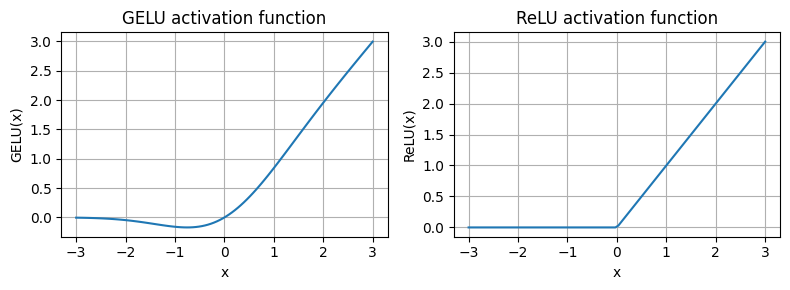

In [146]:
import matplotlib.pyplot as plt

gelu, relu = GELU(), nn.ReLU()

# Some sample data
x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">

As we can see in the resulting plot, ```ReLU``` is a piecewise ```linear function``` that outputs the input directly if it is positive; otherwise, it outputs ```zero```.

```GELU``` is a smooth, ```nonlinear function``` that approximates ReLU but with a ```non-zero gradient for negative values```.
</div>

<div class="alert alert-block alert-warning">

The ```smoothness of GELU```, as shown in the above figure, can lead to better optimization properties during training, as it allows for more nuanced adjustments to the model's parameters.

In contrast, ```ReLU has a sharp corner at zero```, which can sometimes make ```optimization harder```, especially in networks that are very deep or have complex architectures.

Moreover, ```unlike RELU, which outputs zero for any negative input, GELU allows for a small, non-zero output for negative values```.

This characteristic means that during the training process, ```neurons that
receive negative inputs can still contribute to the learning process```, albeit to a ```lesser extent than positive inputs```.

</div>

<div class="alert alert-block alert-success">

Next, let's use the ```GELU function``` to implement the small neural network module, ```FeedForward``` that we will be using in the LLM's transformer block later:
</div>

In [147]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers (number of transformer block). Each transformer block will have its multi-head attention
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

In [148]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),   # Expansion
            GELU(),  # Activation Function
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),   # Contraction
        )

    def forward(self, x):
        return self.layers(x)

In [149]:
print(GPT_CONFIG_124M["emb_dim"])


768


<div class="alert alert-block alert-info">

As we can see in the preceding code, the ```FeedForward module``` is a small neural network consisting of ```two Linear layers``` and a ```GELU activation function```.

In the ```124 million parameter GPT model```, it receives the input batches with tokens that have an ```embedding size of 768``` each via the ```GPT_CONFIG_124M dictionary``` where ```GPT_CONFIG_124M["emb_dim"]
= 768```.
</div>

<div class="alert alert-block alert-success">

Let's use the ```GELU function``` to implement the small neural network module,
```FeedForward```, that we will be using in the LLM's transformer block later:
</div>

In [150]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2, 3, 768) #A
out = ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


<div class="alert alert-block alert-warning">

The ```FeedForward module``` we implemented in this section plays a crucial role in enhancing the model's ability to learn from and generalize the data.


Although the input and output dimensions of this module are the same, it internally expands the ```embedding dimension into a higher-dimensional space through the first linear layer```.

This expansion is followed by a ```non-linear GELU activation```, and then a ```contraction back``` to the original dimension with the second linear transformation.

Such a design allows for the exploration of a richer representation space.

</div>

<div class="alert alert-block alert-warning">

Moreover, the uniformity in input and output dimensions simplifies the architecture by enabling the stacking of multiple layers, as we will do later, without the need to adjust dimensions between them, thus making the model more scalable.
</div>

## **GPT ARCHITECTURE PART 4: SHORTCUT CONNECTIONS**

<div class="alert alert-block alert-success">

Let us see how we can add shortcut connections to the forward method:
</div>

In [151]:
class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_sizes, use_shortcut):
        super().__init__()
        self.use_shortcut = use_shortcut
        self.layers = nn.ModuleList([
            nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]), GELU())
        ])

    def forward(self, x):
        for layer in self.layers:
            # Compute the output of the current layer
            layer_output = layer(x)
            # Check if shortcut can be applied
            if self.use_shortcut and x.shape == layer_output.shape:
                x = x + layer_output
            else:
                x = layer_output
        return x

<div class="alert alert-block alert-info">

The code implements a deep neural network with 5 layers, each consisting of a  ```Linear layer and a GELU activation function```.

In the forward pass, we iteratively pass the inputs through the layers and optionally add the shortcut connections  if the ```self.use_shortcut``` attribute is set to ```True```.
</div>

<div class="alert alert-block alert-success">

Let's use this code to first initialize a neural network without shortcut connections. Here, each layer will be initialized such that it accepts an example with ```3 input values and returns 3 output values```. The last layer returns a single output value:
</div>

In [152]:
layer_sizes = [3, 3, 3, 3, 3, 1]
sample_input = torch.tensor([[1., 0., -1.]])
torch.manual_seed(123) # specify random seed for the initial weights for reproducibility
model_without_shortcut = ExampleDeepNeuralNetwork(
layer_sizes, use_shortcut=False
)

<div class="alert alert-block alert-success">

Next, we implement a function that computes the gradients in the the model's backward pass:
</div>

In [153]:
def print_gradients(model, x):
    # Forward pass
    output = model(x)
    target = torch.tensor([[0.]])

    # Calculate loss based on how close the target and output are
    loss = nn.MSELoss()
    loss = loss(output, target)

    # Backward pass to calculate the gradients
    loss.backward()

    for name, param in model.named_parameters():
        if 'weight' in name:
            # Print the mean absolute gradient of the weights
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")

<div class="alert alert-block alert-warning">

In the preceding code, we specify a ```loss function``` that computes how close the ```model output``` and a ```user-specified target (here, for simplicity, the value 0)``` are.

Then, when calling ```loss.backward()```, PyTorch computes the ```loss gradient``` for each layer in the model.

We can iterate through the weight parameters via ```model.named_parameters()```.

Suppose we have a ```3×3 weight parameter matrix``` for a given layer.

In that case, this layer will have ```3×3 gradient values```, and we print the ```mean absolute gradient``` of these ```3×3 gradient values``` to obtain a ```single gradient value``` per layer to compare the gradients between layers more easily.
</div>

<div class="alert alert-block alert-warning">

In short, the ```.backward()``` method is a convenient method in PyTorch that computes ```loss gradients```, which are required during model training, without implementing the math for the gradient calculation ourselves, thereby making working with deep neural networks much
more accessible.
</div>

<div class="alert alert-block alert-success">

Let's now use the ```print_gradients``` function and apply it to the model without skip connections:
</div>

In [154]:
print_gradients(model_without_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.00020173584925942123
layers.1.0.weight has gradient mean of 0.00012011159560643137
layers.2.0.weight has gradient mean of 0.0007152040489017963
layers.3.0.weight has gradient mean of 0.0013988736318424344
layers.4.0.weight has gradient mean of 0.005049645435065031


<div class="alert alert-block alert-info">
As we can see based on the output of the ```print_gradients function```, the gradients become ```smaller``` as we progress from the ```last layer (layers.4) to the first layer (layers.0)```, which is a phenomenon called the ```vanishing gradient problem```.
    
</div>

<div class="alert alert-block alert-success">
Let's now instantiate a model with skip connections and see how it compares:
</div>

In [155]:
torch.manual_seed(123)
model_with_shortcut = ExampleDeepNeuralNetwork(
layer_sizes, use_shortcut=True
)
print_gradients(model_with_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.22169791162014008
layers.1.0.weight has gradient mean of 0.20694105327129364
layers.2.0.weight has gradient mean of 0.32896995544433594
layers.3.0.weight has gradient mean of 0.2665732204914093
layers.4.0.weight has gradient mean of 1.3258540630340576


<div class="alert alert-block alert-info">
As we can see, based on the output, the last layer (layers.4) still has a larger gradient than the other layers.

However, the gradient value stabilizes as we progress towards the
first layer (layers.0) and doesn't shrink to a vanishingly small value.
</div>

<div class="alert alert-block alert-warning">

In conclusion, shortcut connections are important for ```overcoming the limitations``` posed by the ```vanishing gradient problem``` in deep neural networks.

```Shortcut connections``` are a core building block of very large models such as LLMs, and they will help facilitate more effective training by ensuring ```consistent gradient flow``` across layers when we train the GPT model
</div>

## **GPT ARCHITECTURE PART 5: CODING ATTENTION AND LINEAR LAYERS IN A TRANSFORMER BLOCK**

In [156]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers (number of transformer block). Each transformer block will have its multi-head attention
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

***Combine all Neural Network Codes (Components of the Transformer Block) in one cell below:***

In [157]:
# Layer Normalization
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

# GELU Activation
class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x, 3))
        ))

# Feed Forward
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),   # Expansion
            GELU(),  # Activation
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),   # Contraction
        )

    def forward(self, x):
        return self.layers(x)

<div class="alert alert-block alert-success">
Let us code a transformer block as follows:
</div>

<div class="alert alert-block alert-info">

* Step 1: Shortcut connection for attention block

* Step 2:  Shortcut connection for feed forward block

* Step 3: Add the original input back
</div>

In [158]:
class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        # Shortcut connection for attention block
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        # Shortcut connection for feed forward block
        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        return x

<div class="alert alert-block alert-warning">

The given code defines a ```TransformerBlock``` class in PyTorch that includes a ```Multi-Head Attention mechanism (MultiHeadAttention)``` and a ```Feed Forward network (FeedForward)```, both configured based on a provided ```configuration dictionary (cfg)```, such as ```GPT_CONFIG_124M```
</div>

<div class="alert alert-block alert-warning">

Layer normalization ```(LayerNorm)``` is applied before each of these two components, and ```Dropout``` is applied after them to regularize the model and ```prevent overfitting```.

This is also known as ```Pre-LayerNorm```.

Older architectures, such as the original transformer model,
applied layer normalization after the self-attention and feed-forward networks instead, known as ```Post-LayerNorm```, which often leads to worse ```training dynamics```.
</div>

<div class="alert alert-block alert-warning">

The class also implements the forward pass, where each component is followed by a ```Shortcut Connection``` that adds the input of the block to its output. This critical feature helps ```Gradients Flow``` through the network during training and improves the learning of deep models.
</div>

<div class="alert alert-block alert-success">
Using the GPT_CONFIG_124M dictionary we defined earlier, let's instantiate a transformer block and feed it some sample data

</div>

<div class="alert alert-block alert-info">

Create sample input of shape ```[batch_size, num_tokens, emb_dim]```
</div>

In [159]:
torch.manual_seed(123)
x = torch.rand(2, 4, 768) #A
block = TransformerBlock(GPT_CONFIG_124M)
output = block(x)
print("Input shape:", x.shape)
print("Output shape:", output.shape)

Input shape: torch.Size([2, 4, 768])
Output shape: torch.Size([2, 4, 768])


<div class="alert alert-block alert-info">

As we can see from the code output, the ```Transformer Block``` maintains the input dimensions in its output, indicating that the Transformer architecture ```processes sequences of data``` without ```altering their shape throughout the network```.
</div>

<div class="alert alert-block alert-warning">
    
The preservation of shape throughout the ```Transformer Block Architecture``` is not incidental but a crucial aspect of its design.

This design enables its effective application across a wide
range of ```sequence-to-sequence tasks```, where each ```output vector directly corresponds to an input vector```, maintaining a one-to-one relationship.
</div>

<div class="alert alert-block alert-warning">

However, the output is a ```Context Vector``` that encapsulates information from the entire input sequence.

This means that while the physical dimensions of the sequence ```(length and feature size)``` remain unchanged as it passes through the ```Transformer Block```, the ```content of each output vector``` is re-encoded to integrate ```contextual information``` from across the entire input sequence.

</div>

## **GPT ARCHITECTURE PART 6: ENTIRE GPT MODEL ARCHITECTURE IMPLEMENTATION**

In [160]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers (number of transformer block). Each transformer block will have its multi-head attention
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

<div class="alert alert-block alert-info">

The device setting will allow us to train the model on a ```CPU or GPU```, depending on which device the input data sits
    
</div>

In [161]:
class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])

        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

<div class="alert alert-block alert-warning">
    
The __init__ constructor of this ```GPTModel``` class initializes the ```Token and Positional Embedding``` layers using the configurations passed in via a Python dictionary, ```cfg```.

These ```Embedding Layers``` are responsible for converting ```input token indices into dense vectors``` and adding ```positional information```.
</div>

<div class="alert alert-block alert-warning">
    
Next, the __init__ method creates a sequential stack of ```TransformerBlock modules``` equal to the number of layers specified in ```cfg```.

Following the ```Transformer Blocks```, a ```LayerNorm``` layer is applied, standardizing the outputs from the ```Transformer Blocks``` to stabilize the learning process.

Finally, a ```Linear Output Head``` without bias is defined, which
projects the transformer's output into the ```Vocabulary Space``` of the tokenizer to generate ```Logits``` for each token in the vocabulary.
</div>

<div class="alert alert-block alert-warning">
    
The ```Forward``` method takes a ```Batch``` of input token indices, computes their ```Embeddings```, applies the ```Positional Embeddings```, passes the sequence through the ```Transformer Blocks```, normalizes the ```Final Output```, and then computes the ```Logits```, representing the ```Next Token's``` unnormalized probabilities. We will convert these ```logits into tokens``` and ```Text Outputs``` in the next section.
</div>

<div class="alert alert-block alert-success">
Let's now initialize the 124 million parameter GPT model using the GPT_CONFIG_124M dictionary we pass into the cfg parameter and feed it with the batch text input we created at the beginning of this chapter:
</div>

In [163]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
out = model(batch)
print("Input batch:\n", batch)
print("\nOutput shape:", out.shape)
print(out)

Input batch:
 tensor([[41053,   318,   262,  1266,  4346,  3430],
        [   32,  2128,  2000,   287,   257,  2128]])

Output shape: torch.Size([2, 6, 50257])
tensor([[[-0.1140,  0.2445, -0.0682,  ..., -0.0581, -0.1577, -0.7086],
         [ 0.6123, -0.7801, -0.3107,  ...,  0.1596,  0.2029, -0.0004],
         [ 1.3335, -0.1296, -0.0885,  ...,  0.2172, -0.0160, -0.2283],
         [-0.6194,  0.2305,  0.3620,  ...,  0.6092, -0.6148,  0.0712],
         [ 0.6967, -0.1107,  0.2698,  ...,  0.1611,  0.6189, -0.7123],
         [-0.3581,  0.3842,  0.1464,  ...,  0.2633,  0.6629, -1.2838]],

        [[ 0.6024,  0.0269, -0.5911,  ..., -0.3516, -0.0525, -0.5601],
         [-0.0693,  0.1438, -0.2838,  ...,  0.0128,  0.6018, -0.3117],
         [ 1.1867,  0.6152, -0.6235,  ...,  0.1683, -0.7926, -0.3489],
         [-0.4645,  0.4524, -0.5110,  ...,  1.1505, -0.0240, -0.6120],
         [ 1.2885,  0.7537,  0.6123,  ..., -0.2864,  0.0057, -1.0642],
         [-0.9462,  0.2678, -0.0412,  ..., -0.4803,  0.67

<div class="alert alert-block alert-info">

As we can see, the output tensor has the shape ```[2, 6, 50257]```, since we passed in ```2 input texts``` with ```6 tokens``` each. The last dimension, ```50,257```, corresponds to the ```Vocabulary Size``` of the tokenizer. In the next section, we will see how to convert each of these ```50,257-
dimensional output vectors``` back into tokens.
    
</div>

<div class="alert alert-block alert-success">
Using the numel() method, short for "number of elements," we can collect the total number of parameters in the model's parameter tensors:
</div>

In [164]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params:,}")

Total number of parameters: 163,009,536


<div class="alert alert-block alert-danger">
Earlier, we spoke of initializing a 124-million parameter GPT model, so why is the actual number of parameters 163 million, as shown in the preceding code output?
</div>

<div class="alert alert-block alert-warning">
    
The reason is a concept called ```Weight tying``` that is used in the ```Original GPT-2 Architecture```, which means that the ```original GPT-2 architecture``` is reusing the ```weights``` from the ```token embedding layer``` in its ```output layer```.

To understand what this means, let's take a look at the shapes of the ```token embedding layer and linear output layer``` that we initialized on the model via the ```GPTModel``` earlier:

</div>

In [165]:
print("Token embedding layer shape:", model.tok_emb.weight.shape)
print("Output layer shape:", model.out_head.weight.shape)

Token embedding layer shape: torch.Size([50257, 768])
Output layer shape: torch.Size([50257, 768])


<div class="alert alert-block alert-info">

As we can see based on the print outputs, the ```weight tensors``` for both these layers have the same shape:
</div>

<div class="alert alert-block alert-success">
The Token embedding and Output layers are very large due to the number of rows for the 50,257 in the tokenizer's vocabulary. Let's remove the output layer parameter count from
the total GPT-2 model count according to the weight tying:
</div>

In [166]:
total_params_gpt2 = total_params - sum(p.numel() for p in model.out_head.parameters())
print(f"Number of trainable parameters considering weight tying: {total_params_gpt2:,}")

Number of trainable parameters considering weight tying: 124,412,160


<div class="alert alert-block alert-info">

As we can see, the model is now only ```124 million parameters``` large, matching the ```original size of the GPT-2 model```.
</div>

<div class="alert alert-block alert-warning">
    
```Weight tying``` reduces the overall memory footprint and computational complexity of the model. However, in my experience, using separate ```token embedding and output layers``` result in ```better training and model performance```; hence, we are using separate layers in
our GPTModel implementation. The same is true for modern LLMs.

</div>

<div class="alert alert-block alert-success">
Lastly, let us compute the memory requirements of the 163 million parameters in our GPTModel object:
</div>

In [167]:
total_size_bytes = total_params * 4 #A
total_size_mb = total_size_bytes / (1024 * 1024) #B
print(f"Total size of the model: {total_size_mb:.2f} MB")

Total size of the model: 621.83 MB


<div class="alert alert-block alert-warning">
    
In conclusion, by calculating the memory requirements for the ```163 million``` parameters in our ```GPTModel object``` and assuming each parameter is a ```32-bit float``` taking up ```4 bytes```. We find that the total size of the model amounts to ```621.83 MB```, illustrating the relatively large
storage capacity required to accommodate even relatively small LLMs.

</div>

<div class="alert alert-block alert-warning">
    
In this section, we implemented the ```GPTModel architecture``` and saw that it outputs numeric tensors of shape ```[batch_size, num_tokens, vocab_size]```. In the next section, we will write the code to convert these ```output tensors into text```.

</div>

## **GPT ARCHITECTURE PART 7: GENERATING TEXT FROM OUTPUT TOKENS**

<div class="alert alert-block alert-success">
Let us implement the token-generation process as follows:
</div>

<div class="alert alert-block alert-info">

* Step 1: idx is a (batch, n_tokens) array of indices in the current context

* Step 2: Crop current context if it exceeds the supported context size E.g., if LLM supports only 5 tokens, and the
context size is 10 then only the last 5 tokens are used as context

* Step 3: Focus only on the last time step, so that (batch, n_token, vocab_size) becomes (batch, vocab_size)

* Step 4: probas has shape (batch, vocab_size)

* Step 5: idx_next has shape (batch, 1)

* Step 6: Append sampled index to the running sequence, where idx has shape (batch, n_tokens+1)

</div>

In [168]:
def generate_text_simple(model, idx, max_new_tokens, context_size):
    # idx is (batch, n_tokens) array of indices in the current context
    #Input batch (idx): tensor([[6109, 3626, 6100,  345], [6109, 1110, 6622,  257]])

    for _ in range(max_new_tokens):

        # Crop current context if it exceeds the supported context size
        # E.g., if LLM supports only 5 tokens, and the context size is 10
        # then only the last 5 tokens are used as context
        idx_cond = idx[:, -context_size:]

        # Get the predictions
        with torch.no_grad():
            logits = model(idx_cond)   # logits dim = [batch, num_tokens, vocab_size]

        # Focus only on the last time step
        # (batch, n_tokens, vocab_size) becomes (batch, vocab_size)
        logits = logits[:, -1, :]

        # Apply softmax to get probabilities
        probas = torch.softmax(logits, dim=-1)  # (batch, vocab_size)

        # Get the idx of the vocab entry with the highest probability value
        idx_next = torch.argmax(probas, dim=-1, keepdim=True)  # (batch, 1)

        # Append sampled index to the running sequence
        idx = torch.cat((idx, idx_next), dim=1)  # (batch, n_tokens+1)

    return idx

<div class="alert alert-block alert-warning">
    
In the preceeding code, the generate_text_simple function, we use a ```Softmax function``` to convert the ```logits``` into a probability distribution from which we identify the ```position``` with the highest value via ```torch.argmax```.

The ```Softmax Function``` is monotonic, meaning it preserves the order of its inputs when transformed into outputs.

So, in practice, the ```Softmax``` step is redundant since the ```position``` with the ```highest score``` in the ```softmax output tensor``` is the
same position in the logit tensor.

In other words, we could apply the ```torch.argmax function``` to the ```logits tensor``` directly and get identical results.

However, we coded the conversion to illustrate the full process of transforming ```logits to probabilities```, which can add additional intuition, such as that the model generates the most likely next token, which is known as ```Greedy Decoding```.

</div>

<div class="alert alert-block alert-warning">
    
In the next chapter, when we will implement the ```GPT training code```, we will also introduce additional sampling techniques where we modify the ```Softmax outputs``` such that the model doesn't always select the most likely token, which introduces ```Variability and Creativity``` in the generated text.
</div>

<div class="alert alert-block alert-success">
Let's now try out the generate_text_simple function with the "Hello, I want to play" context as model input
</div>

<div class="alert alert-block alert-success">
First, we encode the input context into token IDs:
</div>

In [173]:
start_context = "Hello, I want to play"
encoded = tokenizer.encode(start_context)
print("encoded:", encoded)
encoded_tensor = torch.tensor(encoded).unsqueeze(0) #A
print("encoded_tensor.shape:", encoded_tensor.shape)

encoded: [15496, 11, 314, 765, 284, 711]
encoded_tensor.shape: torch.Size([1, 6])


<div class="alert alert-block alert-success">
Next, we put the model into .eval() mode, which disables random components like dropout, which are only used during training, and use the generate_text_simple function on the encoded input tensor:
</div>

<div class="alert alert-block alert-info">

We disable ```dropout``` since we are not training the model

</div>

In [174]:
model.eval() #A
out = generate_text_simple(
model=model,
idx=encoded_tensor,
max_new_tokens=6,
context_size=GPT_CONFIG_124M["context_length"]
)
print("Output:", out)
print("Output length:", len(out[0]))

Output: tensor([[15496,    11,   314,   765,   284,   711, 46275, 11472, 21692,  9147,
         42954,  8174]])
Output length: 12


<div class="alert alert-block alert-success">
Using the .decode method of the tokenizer, we can convert the IDs back into text:
</div>

In [175]:
decoded_text = tokenizer.decode(out.squeeze(0).tolist())
print(decoded_text)

Hello, I want to play snowball shocked meritsidency Rai jur


<div class="alert alert-block alert-info">

As we can see, based on the ```preceding output```, the ```model generated gibberish```, which is not at all coherent text.

What happened?

The reason why the model is unable to produce coherent text is that we haven't trained it yet.

So far, we just implemented the ```GPT architecture``` and initialized a ```GPT model instance``` with initial random weights.

</div>